<a href="https://colab.research.google.com/github/khalidakram07/Crime_Analysis/blob/main/CrimeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1: Initial data analysis**

In [ ]:
#1
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
#2
link = 'https://drive.google.com/file/d/1STK0QO7NNT0sjLx-KBhKAtiRSCD3P4Rq/view?usp=sharing' # The shareable link

In [ ]:
#3
#link for raw dataset
id="1STK0QO7NNT0sjLx-KBhKAtiRSCD3P4Rq"


In [ ]:
#4
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud 

In [ ]:
#5
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Crime.csv')  
df = pd.read_csv('Crime.csv')
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.



## 1.1 Quality of data

In [ ]:
#6
df.head(1)

Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201219928         1204  180063894  12/21/2018 09:13:13 PM        120   

   Victims             Crime Name1 Crime Name2           Crime Name3  \
0        1  Crime Against Property     Robbery  ROBBERY - STREET-GUN   

  Police District Name  ... Street Prefix Street Name Street Suffix  \
0              WHEATON  ...           NaN     GEORGIA           NaN   

   Street Type         Start_Date_Time End_Date_Time  Latitude Longitude  \
0          AVE  12/21/2018 09:13:00 PM           NaN  39.03627  -77.0499   

  Police District Number             Location  
0                     4D  (39.0363, -77.0499)  

[1 rows x 30 columns]

In [ ]:
#7
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [ ]:
#8
df.shape

(316075, 30)

In [ ]:
#9
##df1.shape

In [ ]:
##top8 = df.head(sELF, n=5)
##top8

In [ ]:
df

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
1         201301798         5016  200035833  09/13/2020 12:26:58 AM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
1             90Z        1   Crime Against Society   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
1                             All Other Offenses   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                       Crime Name3 Police District Name  ...  \
0                             ROBBERY - STREET-GUN              WHEATON  ...   
1       OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2               DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                          LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                            LARCENY - SHOPLIFTING           GERMANTOWN  ...   
...                                            ...                  ...  ...   
316070                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071           PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                         LARCENY - FROM BLDG        SILVER SPRING  ...   
316073                   DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074         BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

       Street Prefix Street Name Street Suffix  Street Type  \
0                NaN     GEORGIA           NaN          AVE   
1                NaN    COLTRANE           NaN           DR   
2                  N     GRANDIN           NaN          AVE   
3                  N     GRANDIN           NaN          AVE   
4                NaN   FREDERICK           NaN           RD   
...              ...         ...           ...          ...   
316070           NaN   CRESTWOOD           NaN           DR   
316071           NaN     DOWNING           NaN           ST   
316072           NaN  UNIVERSITY           NaN          BLV   
316073           NaN    RESEARCH           NaN          BLV   
316074           NaN   SAGEBRUSH           NaN          TER   

               Start_Date_Time           End_Date_Time   Latitude  Longitude  \
0       12/21/2018 09:13:00 PM                     NaN  39.036270 -77.049900   
1  

In [ ]:
df.dtypes


Incident ID                 int64
Offence Code               object
CR Number                   int64
Dispatch Date / Time       object
NIBRS Code                 object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                        object
Address Number            float64
Street Prefix              object
Street Name                object
Street Suffix              object
Street Type                object
Start_Date_Time            object
End_Date_Time              object
Latitude                  float64
Longitude                 float64
Police District Number     object
Location      

In [ ]:
df.shape

(316075, 30)

Number of rows = 316075


Number of columns=30

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Incident ID', 'CR Number', 'Victims', 'Zip Code', 'Address Number',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
numeric_features.describe()

Incident ID     CR Number        Victims       Zip Code  \
count  3.160750e+05  3.160750e+05  316075.000000  312894.000000   
mean   2.012418e+08  1.708755e+08       1.022786   20876.522158   
std    8.910179e+04  6.176064e+07       0.193266     167.491914   
min    2.010871e+08  1.001107e+07       1.000000       6.000000   
25%    2.011648e+08  1.705460e+08       1.000000   20853.000000   
50%    2.012409e+08  1.900243e+08       1.000000   20878.000000   
75%    2.013181e+08  2.100035e+08       1.000000   20904.000000   
max    2.013968e+08  3.300378e+08      22.000000   29882.000000   

       Address Number       Latitude      Longitude  
count    2.893170e+05  316075.000000  316075.000000  
mean     8.406221e+03      38.013101     -75.006721  
std      1.616907e+04       6.373974      12.575350  
min      1.000000e+00       0.000000     -77.516753  
25%      1.600000e+03      39.019801     -77.197020  
50%      8.100000e+03      39.072290     -77.098956  
75%      1.250000e+04      39.141950     -77.028774  
max      2.090600e+06      90.000000       0.000000

In [ ]:
categorical_features = df.select_dtypes(include=[np.object])

categorical_features.columns

<ipython-input-128-e60789c2f7e8>:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Index(['Offence Code', 'Dispatch Date / Time', 'NIBRS Code', 'Crime Name1',
       'Crime Name2', 'Crime Name3', 'Police District Name', 'Block Address',
       'City', 'State', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Police District Number',
       'Location'],
      dtype='object')

Background: The premise for crime dataset is, the crimes reported are recorded. These recorded crimes are subject to changes based on hearing in future.

Initial data analysis : 20 pts

This criterion is linked to a learning outcomeInitial Data Analysis
Discuss about the quality of data that you have. Are there many missing values, data is clean, etc.). Are different transformation methods required for your further analysis? Make sure that you discuss the different methods of data cleaning, different methods to account for missing data (Null values), pre-processing, and transform features. What are the different types of data wrangling skills (e.g., extraction, merging, and/or construction of analytical data sets) that can be used?

## 1.2 Frequency counts (Missing values)

In [ ]:
df.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49142
NIBRS Code                     0
Victims                        0
Crime Name1                  284
Crime Name2                  284
Crime Name3                  284
Police District Name          93
Block Address              26856
City                        1275
State                          0
Zip Code                    3181
Agency                         0
Place                          0
Sector                      1798
Beat                        1798
PRA                          245
Address Number             26758
Street Prefix             301915
Street Name                    1
Street Suffix             310621
Street Type                  340
Start_Date_Time                0
End_Date_Time             167161
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

Year                           0
Month                          0
Year-Month                     0
Day                            0
Committed_At_Morning           0

In [ ]:
df.shape

(316075, 30)

visualising missing values

In [ ]:
##asd=nopsa

## 1.3 Descriptive statistics

In [ ]:
df_city_group = df.groupby("City")

In [ ]:

df_city_group.mean()


Incident ID     CR Number   Victims      Zip Code  \
City                                                                   
0                 2.013730e+08  2.200167e+08  1.000000  20850.000000   
ADELPHI           2.011439e+08  1.342781e+08  1.250000  20783.000000   
ASHTON            2.012343e+08  1.662785e+08  1.013889  20859.806977   
ASPEN HILL        2.013912e+08  2.200384e+08  1.000000  20906.000000   
BARNESVILLE       2.012286e+08  1.688074e+08  1.040000  20838.240000   
...                        ...           ...       ...           ...   
WASHINGTON        2.012693e+08  1.894855e+08  1.000000  20009.043478   
WASHINGTON GROVE  2.013463e+08  2.111428e+08  1.000000  20879.666667   
WEST FRIENDSHIP   2.013178e+08  2.100033e+08  1.000000  21794.000000   
WHEATON           2.013627e+08  2.133731e+08  1.000000  20895.166667   
WOODBINE          2.011893e+08  1.581762e+08  1.000000  21666.285714   

                  Address Number   Latitude  Longitude  
City                                                    
0                            NaN   0.000000   0.000000  
ADELPHI              5250.000000   0.000000   0.000000  
ASHTON               6463.019656  37.426731 -73.622141  
ASPEN HILL          14000.000000  39.083100 -77.080900  
BARNESVILLE         20402.702703  38.437473 -75.826839  
...                          ...        ...        ...  
WASHINGTON           1985.714286   1.700063  -3.354796  
WASHINGTON GROVE     2586.000000  26.091780 -51.449800  
WEST FRIENDSHIP      2900.000000   0.000000   0.000000  
WHEATON                      NaN   0.000000   0.000000  
WOODBINE             9600.000000  39.277579 -77.140837  

[70 rows x 7 columns]

In [ ]:
df_city_group['Victims']

In [ ]:
df.describe()

Incident ID     CR Number        Victims       Zip Code  \
count  3.160750e+05  3.160750e+05  316075.000000  312894.000000   
mean   2.012418e+08  1.708755e+08       1.022786   20876.522158   
std    8.910179e+04  6.176064e+07       0.193266     167.491914   
min    2.010871e+08  1.001107e+07       1.000000       6.000000   
25%    2.011648e+08  1.705460e+08       1.000000   20853.000000   
50%    2.012409e+08  1.900243e+08       1.000000   20878.000000   
75%    2.013181e+08  2.100035e+08       1.000000   20904.000000   
max    2.013968e+08  3.300378e+08      22.000000   29882.000000   

       Address Number       Latitude      Longitude  
count    2.893170e+05  316075.000000  316075.000000  
mean     8.406221e+03      38.013101     -75.006721  
std      1.616907e+04       6.373974      12.575350  
min      1.000000e+00       0.000000     -77.516753  
25%      1.600000e+03      39.019801     -77.197020  
50%      8.100000e+03      39.072290     -77.098956  
75%      1.250000e+04      39.141950     -77.028774  
max      2.090600e+06      90.000000       0.000000

## 1.4 Data transformation

In [ ]:
df.head()

Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201219928         1204  180063894  12/21/2018 09:13:13 PM        120   
1    201301798         5016  200035833  09/13/2020 12:26:58 AM        90Z   
2    201221577         5404  190000342  01/03/2019 02:48:47 AM        90D   
3    201221577         9053  190000342  01/03/2019 02:48:47 AM        90Z   
4    201294935         2303  200027681  07/16/2020 05:29:50 PM        23C   

   Victims             Crime Name1                  Crime Name2  \
0        1  Crime Against Property                      Robbery   
1        1   Crime Against Society           All Other Offenses   
2        1   Crime Against Society  Driving Under the Influence   
3        1                   Other           All Other Offenses   
4        1  Crime Against Property                  Shoplifting   

                                  Crime Name3 Police District Name  ...  \
0                        ROBBERY - STREET-GUN              WHEATON  ...   
1  OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2          DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                     LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                       LARCENY - SHOPLIFTING           GERMANTOWN  ...   

  Street Prefix Street Name Street Suffix  Street Type  \
0           NaN     GEORGIA           NaN          AVE   
1           NaN    COLTRANE           NaN           DR   
2             N     GRANDIN           NaN          AVE   
3             N     GRANDIN           NaN          AVE   
4           NaN   FREDERICK           NaN           RD   

          Start_Date_Time           End_Date_Time   Latitude  Longitude  \
0  12/21/2018 09:13:00 PM                     NaN  39.036270 -77.049900   
1  08/08/2020 05:10:00 PM  08/08/2020 12:00:00 AM  39.277840 -77.211500   
2  01/03/2019 02:48:00 AM  01/03/2019 02:48:00 AM  39.086688 -77.144754   
3  01/03/2019 02:48:00 AM  01/03/2019 02:48:00 AM  39.086688 -77.144754   
4  07/16/2020 05:29:00 PM                     NaN  39.198295 -77.244900   

  Police District Number             Location  
0                     4D  (39.0363, -77.0499)  
1                     5D  (39.2778, -77.2115)  
2                     1D  (39.0867, -77.1448)  
3                     1D  (39.0867, -77.1448)  
4                     5D  (39.1983, -77.2449)  

[5 rows x 30 columns]

## 1.5 Basic plots

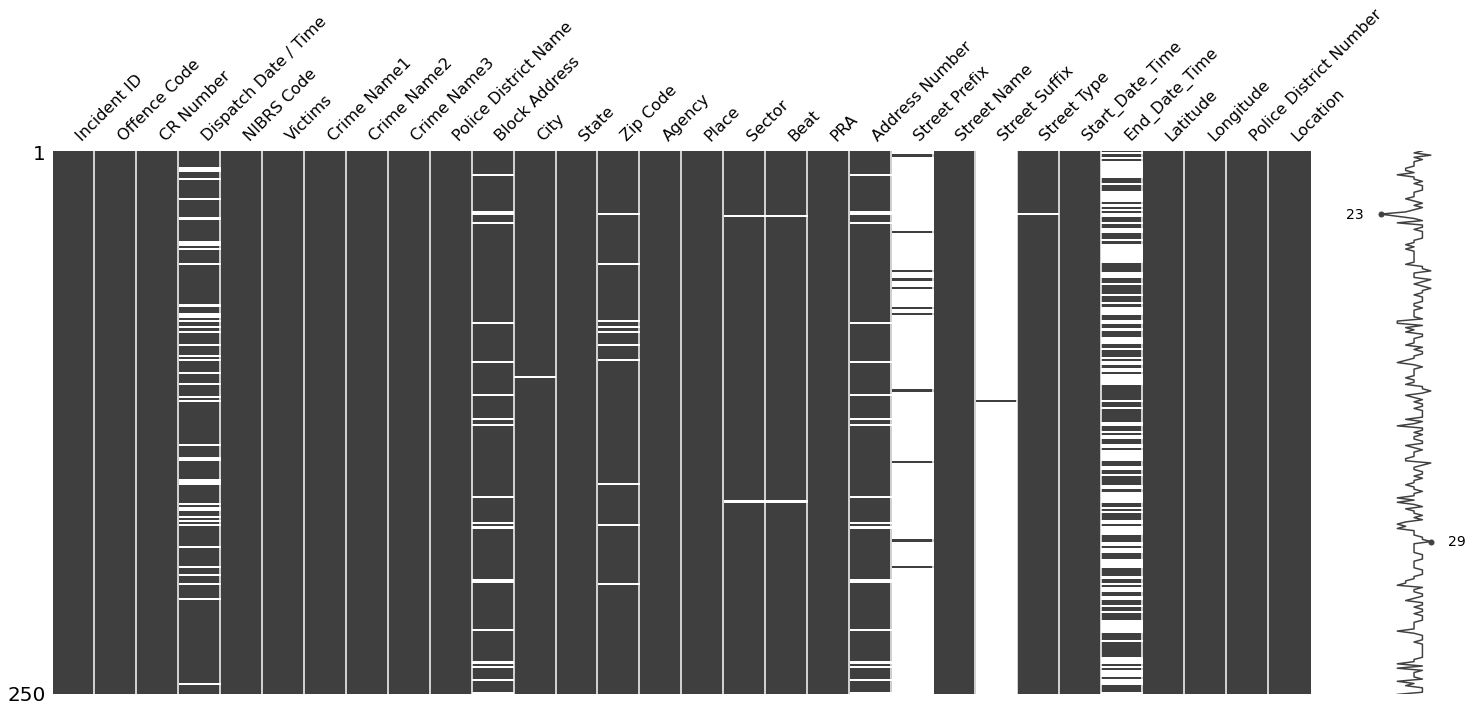

In [ ]:
msno.matrix(df.sample(250))

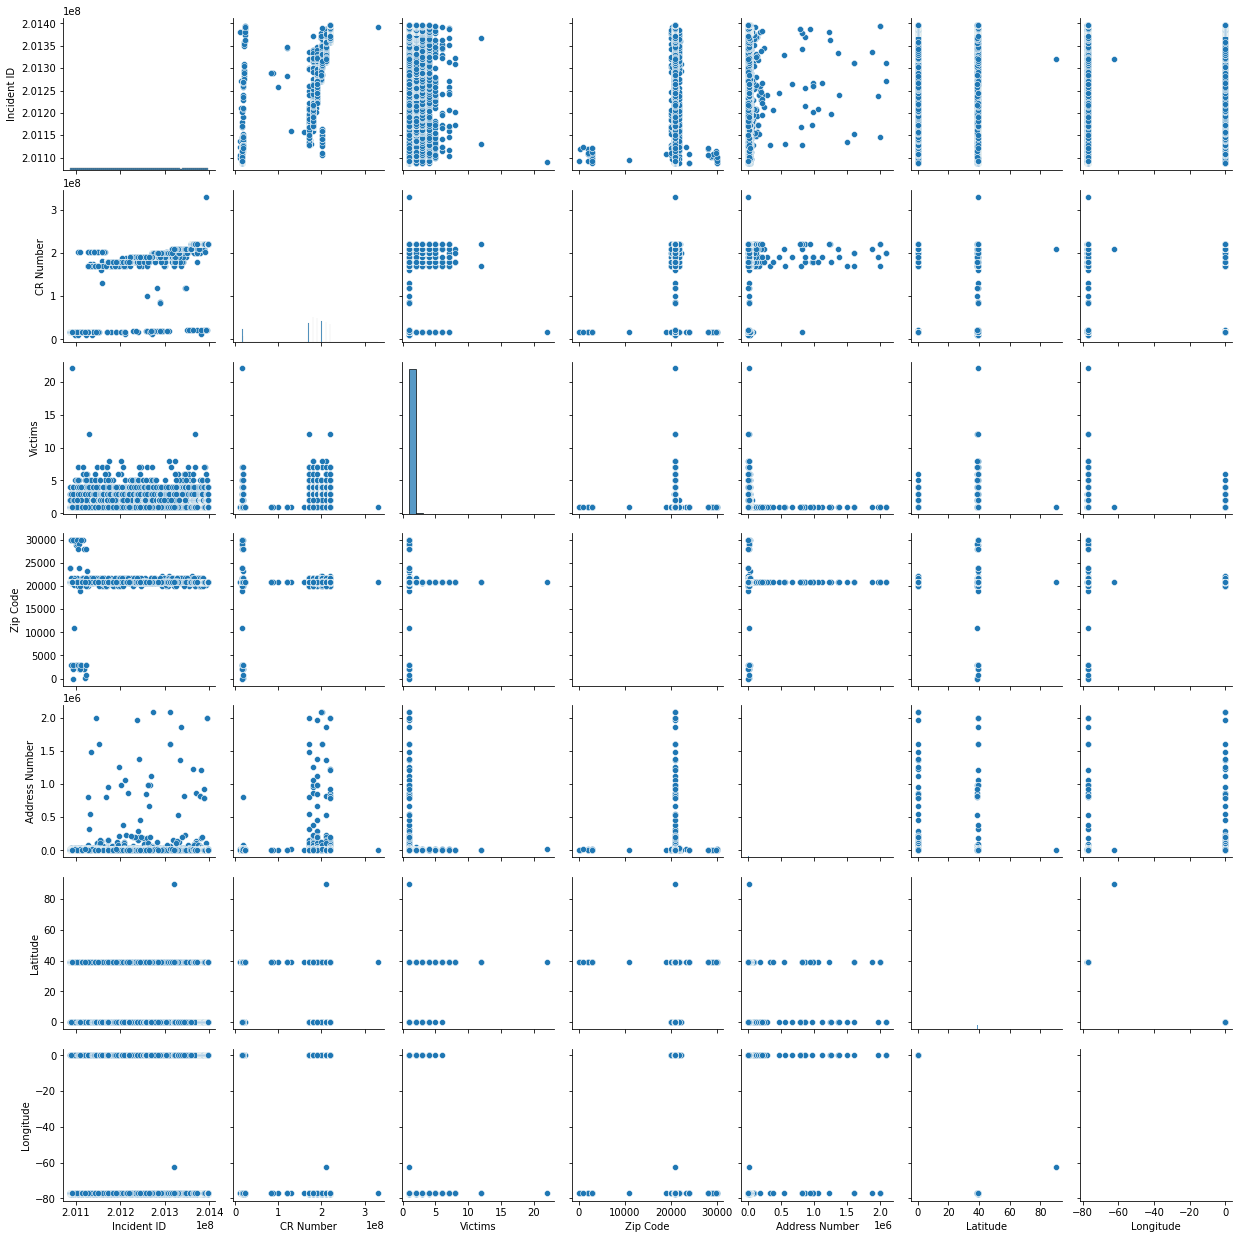

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#df = pd.read_csv('dataset.csv', sep=',')

#sns.distplot(df['Victims'])
sns.pairplot(df)
plt.savefig('PairPlot.png', bbox_inches='tight')

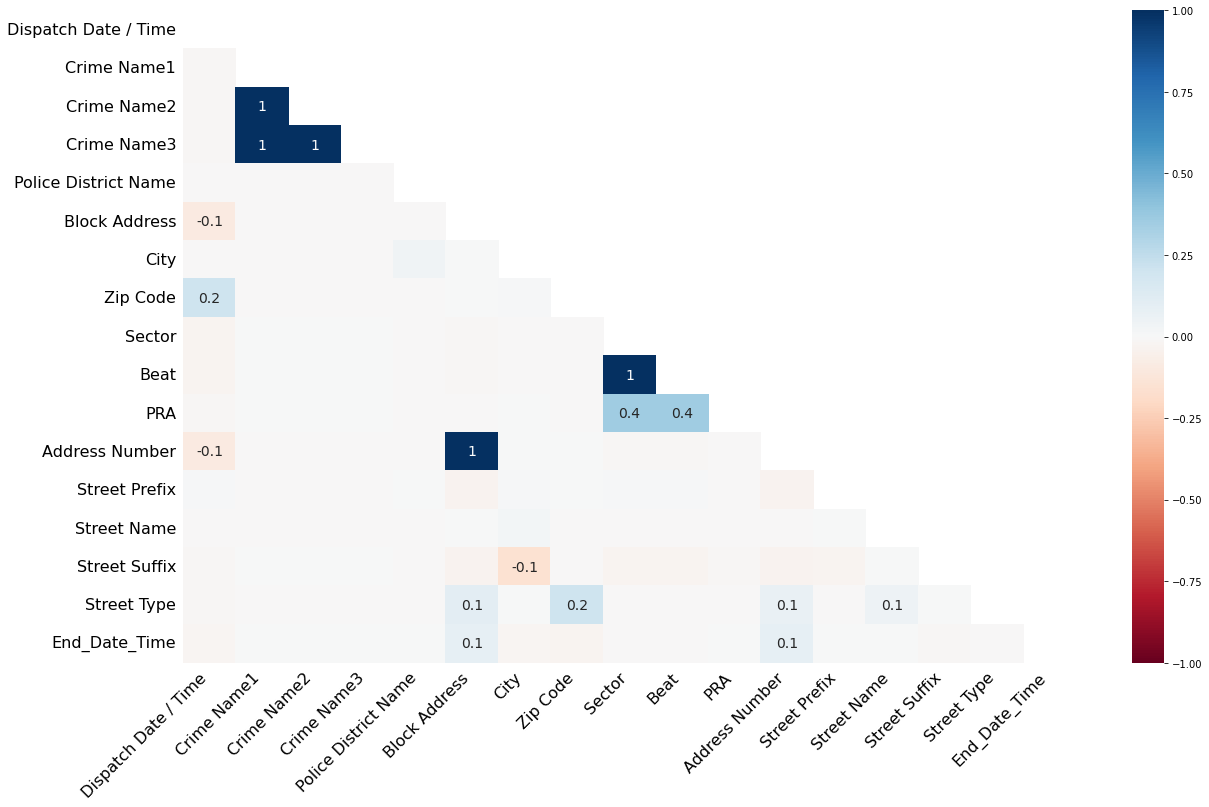

In [ ]:
msno.heatmap(df)
plt.savefig('HeatMap.png', bbox_inches='tight')

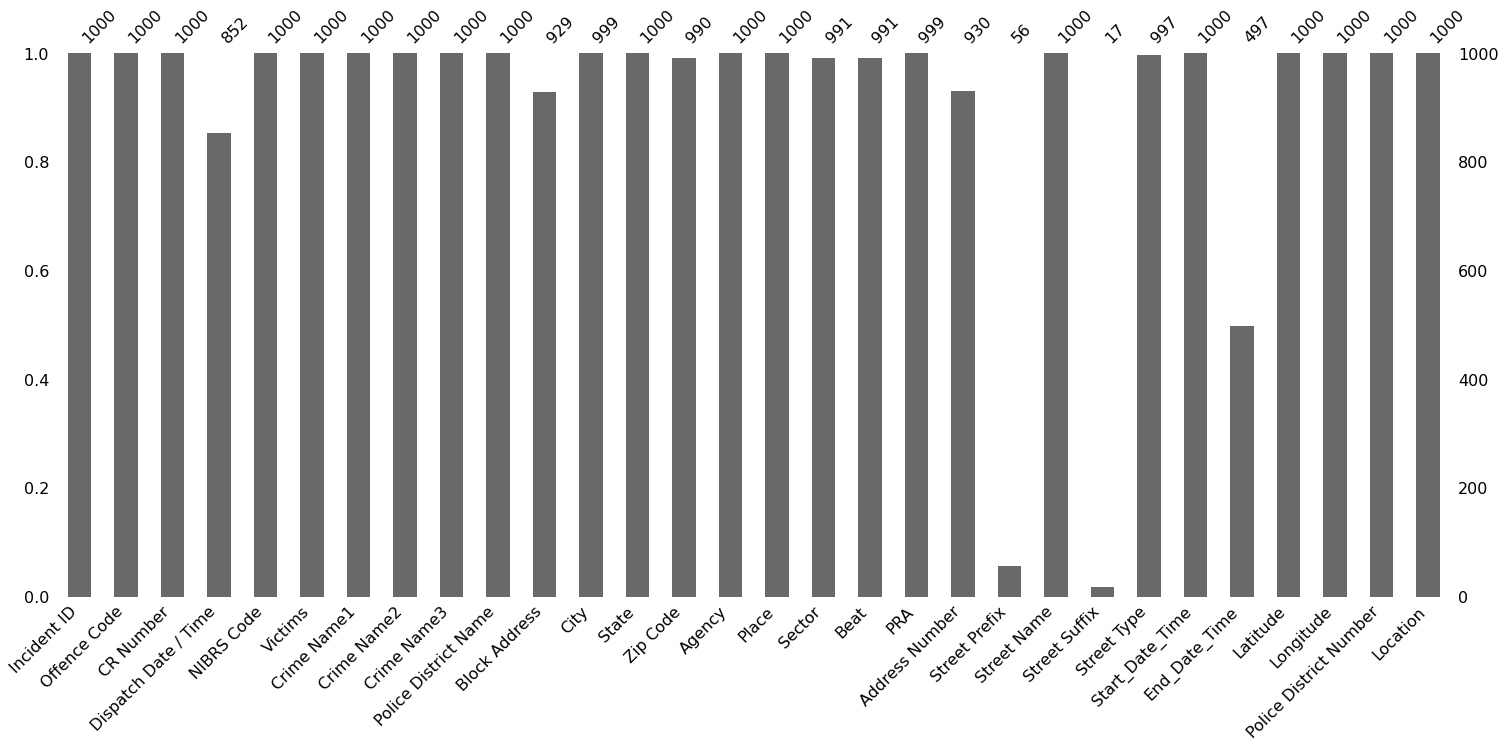

In [ ]:
msno.bar(df.sample(1000))
plt.savefig('foo.png', bbox_inches='tight')

Dendrogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

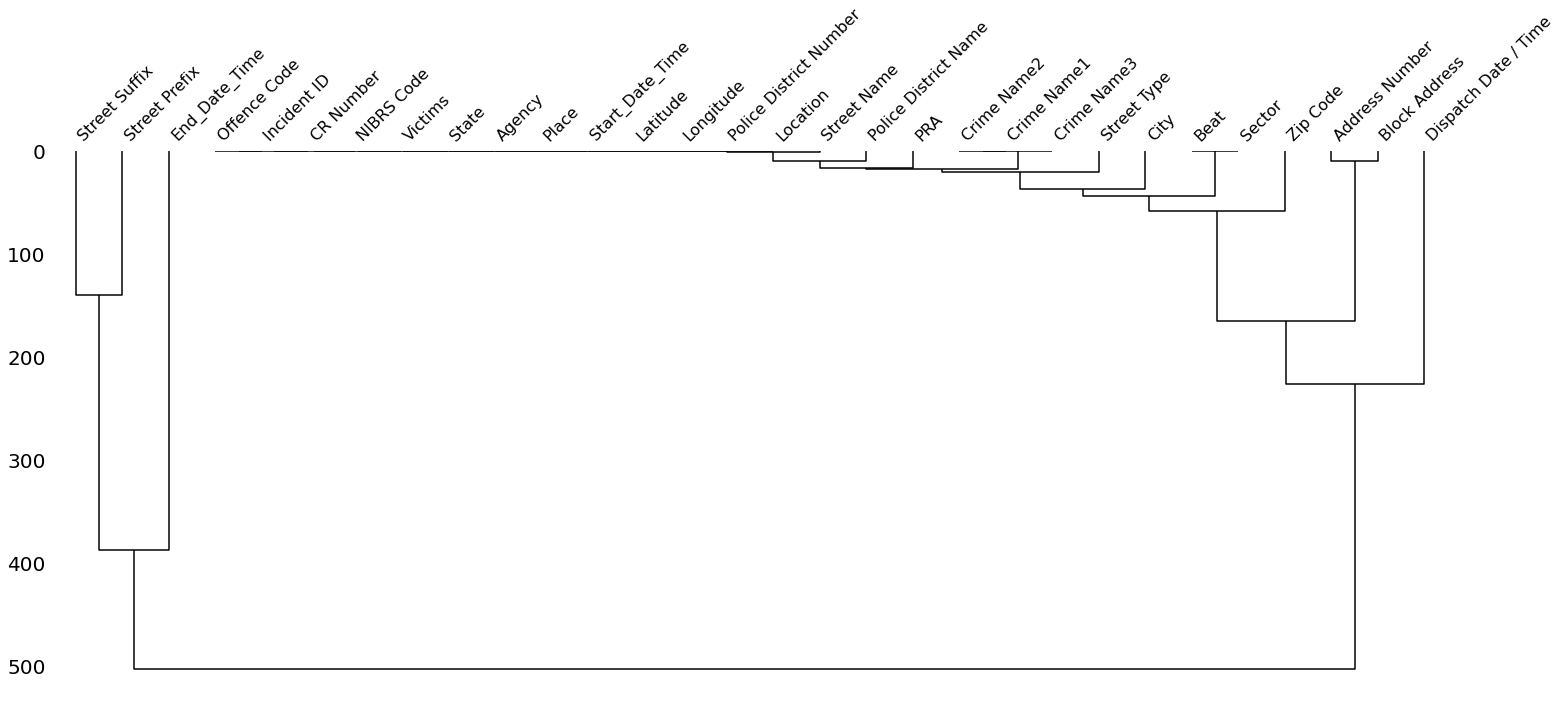

In [ ]:
msno.dendrogram(df)
plt.savefig('Dendogram.png', bbox_inches='tight')

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity , then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

In [ ]:
df.tail()

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                Crime Name3 Police District Name  ...  \
316070                 ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071    PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                  LARCENY - FROM BLDG        SILVER SPRING  ...   
316073            DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074  BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

       Street Prefix Street Name Street Suffix  Street Type  \
316070           NaN   CRESTWOOD           NaN           DR   
316071           NaN     DOWNING           NaN           ST   
316072           NaN  UNIVERSITY           NaN          BLV   
316073           NaN    RESEARCH           NaN          BLV   
316074           NaN   SAGEBRUSH           NaN          TER   

               Start_Date_Time           End_Date_Time  Latitude Longitude  \
316070  10/15/2022 04:18:00 AM                     NaN  39.14687  -77.1926   
316071  10/17/2022 03:29:00 PM                     NaN  39.13658  -77.2084   
316072  10/17/2022 12:30:00 PM  10/17/2022 01:58:00 PM  38.99715  -76.9931   
316073  10/15/2022 09:00:00 PM  10/17/2022 06:35:00 AM  39.10497  -77.1905   
316074  10/07/2022 04:00:00 PM  10/16/2022 12:30:00 PM  39.08456  -76.9571   

       Police District Number             Location  
316070                     6D  (39.1469, -77.1926)  
316071                     6D  (39.1366, -77.2084)  
316072                     3D  (38.9971, -76.9931)  
316073                     6D   (39.105, -77.1905)  
316074                     3D  (39.0846, -76.9571)  

[5 rows x 30 columns]

In [ ]:
gkk = df.groupby(['Offence Code', 'Victims'])
gkk.first()

Incident ID  CR Number    Dispatch Date / Time  \
Offence Code Victims                                                   
302          1          201235141  190016194  04/07/2019 08:42:06 PM   
901          1          201315123  210000308  01/04/2021 02:42:33 AM   
902          1          201367185  220009718  03/06/2022 09:30:46 PM   
903          1          201366933  220009438  03/04/2022 06:49:24 PM   
             2          201137686  170512009  06/05/2017 10:48:05 PM   
...                           ...        ...                     ...   
9199         4          201379304  220024328  06/07/2022 12:53:00 AM   
             12         201366627  220009118  03/02/2022 09:34:35 PM   
9201         1          201371798  220015281  04/10/2022 10:29:42 PM   
FTAS         1          201113039   16045462  09/29/2018 12:52:46 AM   
NSUP         4          201210509  180051757  10/16/2018 08:59:50 AM   

                     NIBRS Code            Crime Name1  \
Offence Code Victims                                     
302          1              90Z  Crime Against Society   
901          1              09A   Crime Against Person   
902          1              09A   Crime Against Person   
903          1              09A   Crime Against Person   
             2              09A   Crime Against Person   
...                         ...                    ...   
9199         4              90Z                  Other   
             12             90Z                  Other   
9201         1              90Z                  Other   
FTAS         1              90Z                  Other   
NSUP         4              90Z                  Other   

                                               Crime Name2  \
Offence Code Victims                                         
302          1                          All Other Offenses   
901          1        Murder and Nonnegligent Manslaughter   
902          1        Murder and Nonnegligent Manslaughter   
903          1        Murder and Nonnegligent Manslaughter   
             2        Murder and Nonnegligent Manslaughter   
...                                                    ...   
9199         4                          All Other Offenses   
             12                         All Other Offenses   
9201         1                          All Other Offenses   
FTAS         1                          All Other Offenses   
NSUP         4                          All Other Offenses   

                                                 Crime Name3  \
Offence Code Victims                                           
302          1                             FALSE CITIZENSHIP   
901          1            HOMICIDE - WILLFUL KILL-FAMILY-GUN   
902          1                HOMICIDE - WILLFUL KILL-FAMILY   
903          1        HOMICIDE - WILLFUL KILL-NON-FAMILY-GUN   
             2        HOMICIDE - WILLFUL KILL-NON-FAMILY-GUN   
...                                                      ...   
9199         4                            POLICE INFORMATION   
             12                           POLICE INFORMATION   
9201         1                                      OVERDOSE   
FTAS         1               FAILURE TO APPEAR - NON SUPPORT   
NSUP         4                                   NON SUPPORT   

                     Police District Name                   Block Address  \
Offence Code Victims                                                        
302          1         MONTGOMERY VILLAGE            300 BLK N SUMMIT AVE   
901          1                 GERMANTOWN         22800 BLK  FREDERICK RD   
902          1                   BETHESDA            5600 BLK  LAMBETH RD   
903          1                    WHEATON          11200 BLK  TRIANGLE LA   
             2         MONTGOMERY VILLAGE            8200 BLK  GALLERY CT   
...                                   ...                             ...   
9199         4         MONTGOMERY VILLAGE        7900 BLK  SPICEBERRY CIR 

In [ ]:
gkk = df.groupby(['Victims','Offence Code'])
gkk.first()

Incident ID  CR Number    Dispatch Date / Time  \
Victims Offence Code                                                   
1       302             201235141  190016194  04/07/2019 08:42:06 PM   
        901             201315123  210000308  01/04/2021 02:42:33 AM   
        902             201367185  220009718  03/06/2022 09:30:46 PM   
        903             201366933  220009438  03/04/2022 06:49:24 PM   
        904             201335729  210024213  06/24/2021 11:19:10 AM   
...                           ...        ...                     ...   
8       9108            201323376  210009765  03/15/2021 05:57:06 PM   
        1304            201202272  180041315  08/19/2018 11:54:35 PM   
12      9109            201130045  170502475  04/16/2017 07:13:44 PM   
        9199            201366627  220009118  03/02/2022 09:34:35 PM   
22      1313            201090564   16037345                    None   

                     NIBRS Code            Crime Name1  \
Victims Offence Code                                     
1       302                 90Z  Crime Against Society   
        901                 09A   Crime Against Person   
        902                 09A   Crime Against Person   
        903                 09A   Crime Against Person   
        904                 09A   Crime Against Person   
...                         ...                    ...   
8       9108                90Z                  Other   
        1304                13A   Crime Against Person   
12      9109                90Z                  Other   
        9199                90Z                  Other   
22      1313                13B   Crime Against Person   

                                               Crime Name2  \
Victims Offence Code                                         
1       302                             All Other Offenses   
        901           Murder and Nonnegligent Manslaughter   
        902           Murder and Nonnegligent Manslaughter   
        903           Murder and Nonnegligent Manslaughter   
        904           Murder and Nonnegligent Manslaughter   
...                                                    ...   
8       9108                            All Other Offenses   
        1304                            Aggravated Assault   
12      9109                            All Other Offenses   
        9199                            All Other Offenses   
22      1313                                Simple Assault   

                                                 Crime Name3  \
Victims Offence Code                                           
1       302                                FALSE CITIZENSHIP   
        901               HOMICIDE - WILLFUL KILL-FAMILY-GUN   
        902                   HOMICIDE - WILLFUL KILL-FAMILY   
        903           HOMICIDE - WILLFUL KILL-NON-FAMILY-GUN   
        904               HOMICIDE - WILLFUL KILL-NON-FAMILY   
...                                                      ...   
8       9108                   RECOVERED PROPERTY - MONT CO.   
        1304           ASSAULT - AGGRAVATED - NON-FAMILY-GUN   
12      9109                      RECOVERED PROPERTY - OTHER   
        9199                              POLICE INFORMATION   
22      1313                                ASSAULT - SIMPLE   

                     Police District Name                   Block Address  \
Victims Offence Code                                                        
1       302            MONTGOMERY VILLAGE            300 BLK N SUMMIT AVE   
        901                    GERMANTOWN         22800 BLK  FREDERICK RD   
        902                      BETHESDA            5600 BLK  LAMBETH RD   
        903                       WHEATON          11200 BLK  TRIANGLE LA   
        904                      BETHESDA            4600 BLK  WINDSOR LA   
...                                   ...                             ...   
8       9108           MONTGOMERY VILLAGE         8100 BLK  CHELABERRY CT 

In [ ]:
df['Victims'].describe()

count    316075.000000
mean          1.022786
std           0.193266
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          22.000000
Name: Victims, dtype: float64

In [ ]:
df['Crime Name1'].describe()

count                     315791
unique                         5
top       Crime Against Property
freq                      145258
Name: Crime Name1, dtype: object

In [ ]:
df_ind=df.set_index(['Incident ID'])

In [ ]:
df_ind.head()

Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
Incident ID                                                              
201219928           1204  180063894  12/21/2018 09:13:13 PM        120   
201301798           5016  200035833  09/13/2020 12:26:58 AM        90Z   
201221577           5404  190000342  01/03/2019 02:48:47 AM        90D   
201221577           9053  190000342  01/03/2019 02:48:47 AM        90Z   
201294935           2303  200027681  07/16/2020 05:29:50 PM        23C   

             Victims             Crime Name1                  Crime Name2  \
Incident ID                                                                 
201219928          1  Crime Against Property                      Robbery   
201301798          1   Crime Against Society           All Other Offenses   
201221577          1   Crime Against Society  Driving Under the Influence   
201221577          1                   Other           All Other Offenses   
201294935          1  Crime Against Property                  Shoplifting   

                                            Crime Name3 Police District Name  \
Incident ID                                                                    
201219928                          ROBBERY - STREET-GUN              WHEATON   
201301798    OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN   
201221577            DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE   
201221577                       LITTERING/TRASH DUMPING            ROCKVILLE   
201294935                         LARCENY - SHOPLIFTING           GERMANTOWN   

                       Block Address  ... Street Prefix Street Name  \
Incident ID                           ...                             
201219928     11100 BLK  GEORGIA AVE  ...           NaN     GEORGIA   
201301798     25600 BLK  COLTRANE DR  ...           NaN    COLTRANE   
201221577                        NaN  ...             N     GRANDIN   
201221577                        NaN  ...             N     GRANDIN   
201294935    20900 BLK  FREDERICK RD  ...           NaN   FREDERICK   

             Street Suffix Street Type         Start_Date_Time  \
Incident ID                                                      
201219928              NaN         AVE  12/21/2018 09:13:00 PM   
201301798              NaN          DR  08/08/2020 05:10:00 PM   
201221577              NaN         AVE  01/03/2019 02:48:00 AM   
201221577              NaN         AVE  01/03/2019 02:48:00 AM   
201294935              NaN          RD  07/16/2020 05:29:00 PM   

                      End_Date_Time   Latitude  Longitude  \
Incident ID                                                 
201219928                       NaN  39.036270 -77.049900   
201301798    08/08/2020 12:00:00 AM  39.277840 -77.211500   
201221577    01/03/2019 02:48:00 AM  39.086688 -77.144754   
201221577    01/03/2019 02:48:00 AM  39.086688 -77.144754   
201294935                       NaN  39.198295 -77.244900   

             Police District Number             Location  
Incident ID                                               
201219928                        4D  (39.0363, -77.0499)  
201301798                        5D  (39.2778, -77.2115)  
201221577                        1D  (39.0867, -77.1448)  
201221577                        1D  (39.0867, -77.1448)  
201294935                        5D  (39.1983, -77.2449)  

[5 rows x 29 columns]

In [ ]:
df['Incident ID'].unique().sum()

58374444260706

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time']) 
df['End_Date_Time'] = pd.to_datetime(df['End_Date_Time']) 

In [ ]:
durations = df['End_Date_Time'] - df['Start_Date_Time']

In [ ]:
durations

0                      NaT
1        -1 days +06:50:00
2          0 days 00:00:00
3          0 days 00:00:00
4                      NaT
                ...       
316070                 NaT
316071                 NaT
316072     0 days 01:28:00
316073     1 days 09:35:00
316074     8 days 20:30:00
Length: 316075, dtype: timedelta64[ns]

In [ ]:
df['Durations'] = durations

In [ ]:
df

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
1         201301798         5016  200035833  09/13/2020 12:26:58 AM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
1             90Z        1   Crime Against Society   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
1                             All Other Offenses   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                       Crime Name3 Police District Name  ...  \
0                             ROBBERY - STREET-GUN              WHEATON  ...   
1       OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2               DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                          LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                            LARCENY - SHOPLIFTING           GERMANTOWN  ...   
...                                            ...                  ...  ...   
316070                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071           PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                         LARCENY - FROM BLDG        SILVER SPRING  ...   
316073                   DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074         BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

       Street Name Street Suffix Street Type     Start_Date_Time  \
0          GEORGIA           NaN         AVE 2018-12-21 21:13:00   
1         COLTRANE           NaN          DR 2020-08-08 17:10:00   
2          GRANDIN           NaN         AVE 2019-01-03 02:48:00   
3          GRANDIN           NaN         AVE 2019-01-03 02:48:00   
4        FREDERICK           NaN          RD 2020-07-16 17:29:00   
...            ...           ...         ...                 ...   
316070   CRESTWOOD           NaN          DR 2022-10-15 04:18:00   
316071     DOWNING           NaN          ST 2022-10-17 15:29:00   
316072  UNIVERSITY           NaN         BLV 2022-10-17 12:30:00   
316073    RESEARCH           NaN         BLV 2022-10-15 21:00:00   
316074   SAGEBRUSH           NaN         TER 2022-10-07 16:00:00   

             End_Date_Time   Latitude  Longitude Police District Number  \
0                      NaT  

In [ ]:
df['Offence Code'] = df['Offence Code'].astype(str)
df["OffenceCodeNew"] = df["Offence Code"]  + '-' + df["NIBRS Code"]

In [ ]:
df

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
1         201301798         5016  200035833  09/13/2020 12:26:58 AM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
1             90Z        1   Crime Against Society   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
1                             All Other Offenses   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                       Crime Name3 Police District Name  ...  \
0                             ROBBERY - STREET-GUN              WHEATON  ...   
1       OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2               DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                          LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                            LARCENY - SHOPLIFTING           GERMANTOWN  ...   
...                                            ...                  ...  ...   
316070                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071           PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                         LARCENY - FROM BLDG        SILVER SPRING  ...   
316073                   DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074         BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

       Street Suffix Street Type     Start_Date_Time       End_Date_Time  \
0                NaN         AVE 2018-12-21 21:13:00                 NaT   
1                NaN          DR 2020-08-08 17:10:00 2020-08-08 00:00:00   
2                NaN         AVE 2019-01-03 02:48:00 2019-01-03 02:48:00   
3                NaN         AVE 2019-01-03 02:48:00 2019-01-03 02:48:00   
4                NaN          RD 2020-07-16 17:29:00                 NaT   
...              ...         ...                 ...                 ...   
316070           NaN          DR 2022-10-15 04:18:00                 NaT   
316071           NaN          ST 2022-10-17 15:29:00                 NaT   
316072           NaN         BLV 2022-10-17 12:30:00 2022-10-17 13:58:00   
316073           NaN         BLV 2022-10-15 21:00:00 2022-10-17 06:35:00   
316074           NaN         TER 2022-10-07 16:00:00 2022-10-16 12:30:00   

       

In [ ]:
from datetime import datetime
Quarters = []
Q1 =  datetime.strptime('00:00:00', "%H:%M:%S")
Q2 =  datetime.strptime('06:00:00', "%H:%M:%S")
Q3 =  datetime.strptime('12:00:00', "%H:%M:%S")
Q4 =  datetime.strptime('18:00:00', "%H:%M:%S")
for index in df.loc[:, 'Start_Date_Time']:
    time = pd.to_datetime(index)
    if(time.time() > Q1.time() and time.time() < Q2.time()):
        Quarters.append('Q1')
        print('Q1')
    elif(time.time() > Q2.time() and time.time() < Q3.time()):
        Quarters.append('Q2')
        print('Q2')
    elif(time.time() > Q3.time() and time.time() < Q4.time()):
        Quarters.append('Q3')
        print('Q3')
    else:
        Quarters.append('Q4')
        print('Q4')
        
    ##print(time.time() > Q1.time() and time.time() < Q2.time())
    

Streaming output truncated to the last 5000 lines.
Q2
Q2
Q2
Q4
Q2
Q3
Q3
Q2
Q2
Q4
Q2
Q2
Q4
Q4
Q3
Q2
Q4
Q4
Q3
Q3
Q4
Q4
Q2
Q2
Q3
Q3
Q3
Q3
Q3
Q3
Q4
Q3
Q3
Q3
Q1
Q4
Q3
Q4
Q3
Q4
Q3
Q1
Q3
Q3
Q4
Q4
Q4
Q4
Q1
Q4
Q1
Q1
Q3
Q4
Q4
Q1
Q1
Q1
Q1
Q4
Q4
Q3
Q2
Q4
Q3
Q2
Q4
Q2
Q2
Q3
Q3
Q4
Q2
Q4
Q4
Q3
Q3
Q2
Q2
Q3
Q4
Q2
Q3
Q2
Q3
Q4
Q3
Q4
Q3
Q3
Q2
Q4
Q4
Q3
Q3
Q3
Q3
Q4
Q4
Q3
Q3
Q4
Q3
Q3
Q3
Q4
Q3
Q2
Q3
Q3
Q4
Q3
Q4
Q4
Q4
Q4
Q4
Q4
Q3
Q4
Q3
Q2
Q3
Q4
Q1
Q1
Q1
Q2
Q2
Q2
Q2
Q2
Q2
Q4
Q4
Q4
Q4
Q2
Q4
Q4
Q3
Q2
Q4
Q3
Q4
Q4
Q3
Q3
Q2
Q3
Q3
Q3
Q4
Q4
Q3
Q2
Q1
Q4
Q3
Q4
Q3
Q3
Q3
Q3
Q4
Q3
Q4
Q2
Q1
Q4
Q3
Q2
Q2
Q4
Q3
Q3
Q4
Q4
Q3
Q2
Q4
Q1
Q4
Q2
Q3
Q2
Q2
Q4
Q4
Q4
Q4
Q4
Q4
Q4
Q4
Q1
Q1
Q4
Q4
Q1
Q4
Q4
Q4
Q2
Q2
Q4
Q3
Q2
Q2
Q2
Q4
Q4
Q1
Q3
Q2
Q4
Q4
Q2
Q2
Q4
Q2
Q2
Q4
Q4
Q3
Q4
Q2
Q4
Q4
Q3
Q3
Q1
Q4
Q3
Q3
Q3
Q4
Q3
Q3
Q3
Q4
Q3
Q4
Q3
Q4
Q3
Q4
Q4
Q4
Q1
Q1
Q4
Q4
Q3
Q4
Q4
Q3
Q2
Q4
Q3
Q3
Q4
Q3
Q3
Q4
Q4
Q3
Q1
Q4
Q4
Q3
Q4
Q3
Q1
Q3
Q4
Q4
Q4
Q4
Q3
Q3
Q4
Q4
Q1
Q1
Q4
Q1
Q4
Q1
Q1
Q3
Q2
Q3
Q2
Q4
Q4
Q3
Q2
Q4
Q4
Q4
Q3
Q3
Q2
Q1
Q3
Q3
Q4
Q3
Q3
Q2
Q4
Q4
Q1
Q4
Q3
Q

In [ ]:
Quarters

['Q4',
 'Q3',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q4',
 'Q3',
 'Q3',
 'Q3',
 'Q2',
 'Q3',
 'Q4',
 'Q4',
 'Q1',
 'Q4',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q4',
 'Q2',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q3',
 'Q3',
 'Q2',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q3',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q2',
 'Q2',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q2',
 'Q3',
 'Q4',
 'Q4',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q1',
 'Q4',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q2',
 'Q1',
 'Q4',
 'Q1',

In [ ]:
df['Quarters'] = Quarters

In [ ]:
##

In [ ]:
VictimsAgainstCrimes = df.groupby(df['Crime Name1'])[['Victims']].sum()

# Section 2. Exploratory Data Analysis 

In [ ]:
VictimsAgainstCrimes

Victims
Crime Name1                    
Crime Against Person      37816
Crime Against Property   145258
Crime Against Society     70098
Not a Crime                3688
Other                     66123

In [ ]:
df['Years'] = pd.DatetimeIndex(df['Start_Date_Time']).year
df

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
1         201301798         5016  200035833  09/13/2020 12:26:58 AM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
1             90Z        1   Crime Against Society   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
1                             All Other Offenses   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                       Crime Name3 Police District Name  ...  \
0                             ROBBERY - STREET-GUN              WHEATON  ...   
1       OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2               DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                          LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                            LARCENY - SHOPLIFTING           GERMANTOWN  ...   
...                                            ...                  ...  ...   
316070                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071           PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                         LARCENY - FROM BLDG        SILVER SPRING  ...   
316073                   DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074         BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

           Start_Date_Time       End_Date_Time   Latitude  Longitude  \
0      2018-12-21 21:13:00                 NaT  39.036270 -77.049900   
1      2020-08-08 17:10:00 2020-08-08 00:00:00  39.277840 -77.211500   
2      2019-01-03 02:48:00 2019-01-03 02:48:00  39.086688 -77.144754   
3      2019-01-03 02:48:00 2019-01-03 02:48:00  39.086688 -77.144754   
4      2020-07-16 17:29:00                 NaT  39.198295 -77.244900   
...                    ...                 ...        ...        ...   
316070 2022-10-15 04:18:00                 NaT  39.146870 -77.192600   
316071 2022-10-17 15:29:00                 NaT  39.136580 -77.208400   
316072 2022-10-17 12:30:00 2022-10-17 13:58:00  38.997150 -76.993100   
316073 2022-10-15 21:00:00 2022-10-17 06:35:00  39.104970 -77.190500   
316074 2022-10-07 16:00:00 2022-10-16 12:30:00  39.084560 -76.957100   

       Police District Number             Location     

In [ ]:
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Durations', 'OffenceCodeNew',
       'Quarters', 'Years'],
      dtype='object')

## 2.2 Correlation structures

In [ ]:
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Durations', 'OffenceCodeNew',
       'Quarters', 'Years'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



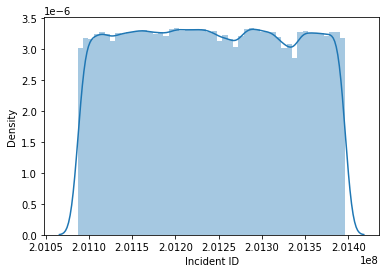

In [ ]:
incident_id=df['Incident ID'].dropna()
sns.distplot(incident_id)         
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



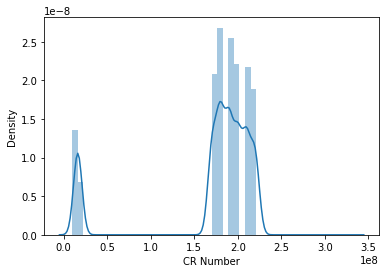

In [ ]:
CrNumber=df['CR Number'].dropna()
sns.distplot(CrNumber)         
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



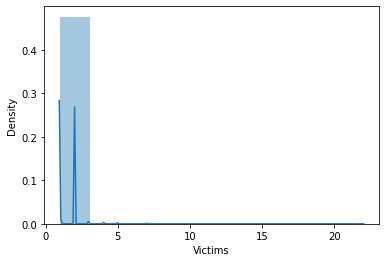

In [ ]:
Victims=df['Victims'].dropna()
sns.distplot(Victims,bins=10)         
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



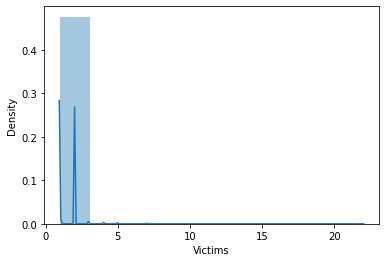

In [ ]:
Victims=df['Victims'].dropna()
sns.distplot(Victims,bins=10)         
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



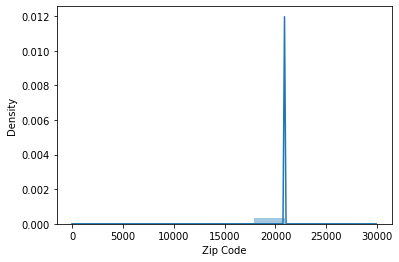

In [ ]:
ZipCode=df['Zip Code'].dropna()
sns.distplot(ZipCode,bins=10)         
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



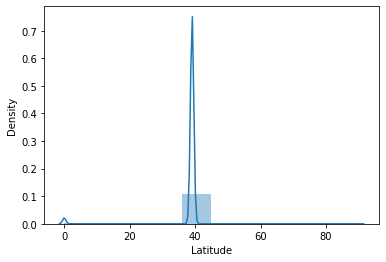

In [ ]:
Latitude=df['Latitude'].dropna()
sns.distplot(Latitude,bins=10)         
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



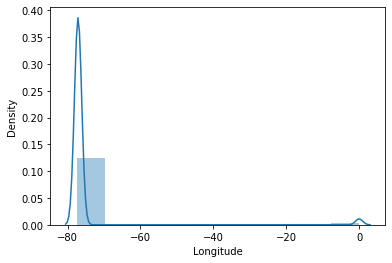

In [ ]:
Longitude=df['Longitude'].dropna()
sns.distplot(Longitude,bins=10)         
plt.show()

## 2.3 Trends in Data

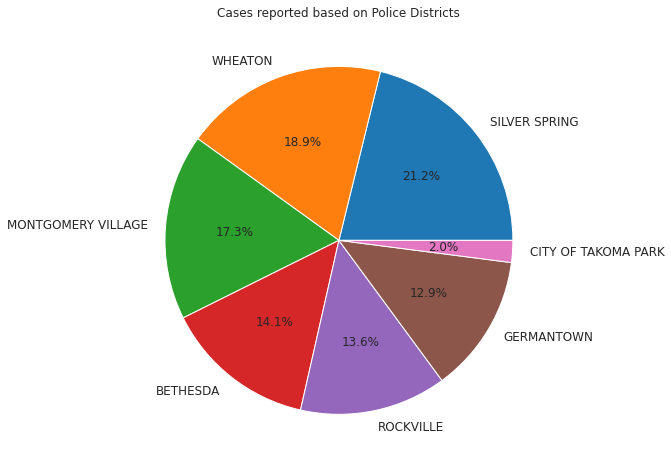

In [ ]:
with sns.axes_style('white'):
    # count for each sub-categories in crime name1
    df['Police District Name'].value_counts().head(n=7).plot.pie(autopct='%1.1f%%',figsize=(10, 8),shadow=False,
        fontsize=12)

plt.title(label='Cases reported based on Police Districts')
plt.ylabel('')
plt.savefig('Cases reported based on Police Districts.png')

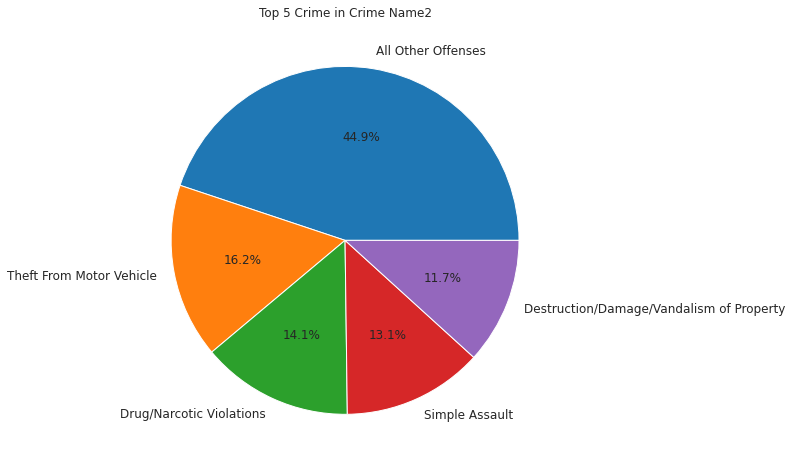

In [ ]:
with sns.axes_style('white'):
    # count for each sub-categories in crime name1
    df['Crime Name2'].value_counts().head(n=5).plot.pie(autopct='%1.1f%%',figsize=(10, 8),shadow=False,
        fontsize=12)

plt.title(label='Top 5 Crime in Crime Name2')
plt.ylabel('')
plt.savefig('Top 5 Crime in Crime Name2.png')

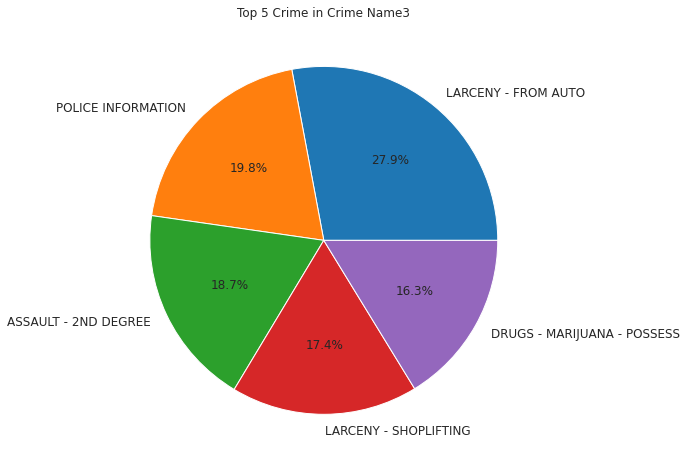

In [ ]:
with sns.axes_style('white'):
    # count for each sub-categories in crime name1
    df['Crime Name3'].value_counts().head(n=5).plot.pie(autopct='%1.1f%%',figsize=(10, 8),shadow=False,
        fontsize=12)

plt.title(label='Top 5 Crime in Crime Name3')
plt.ylabel('')
plt.savefig('Top 5 Crime in Crime Name3.png')

In [ ]:
crimeVictims = df.groupby(['Crime Name1'])['Victims'].sum()
crimeVictims = pd.DataFrame(crimeVictims)
crimeVictims = crimeVictims.reset_index(level=0)
crimeVictims

Crime Name1  Victims
0    Crime Against Person    37816
1  Crime Against Property   145258
2   Crime Against Society    70098
3             Not a Crime     3688
4                   Other    66123

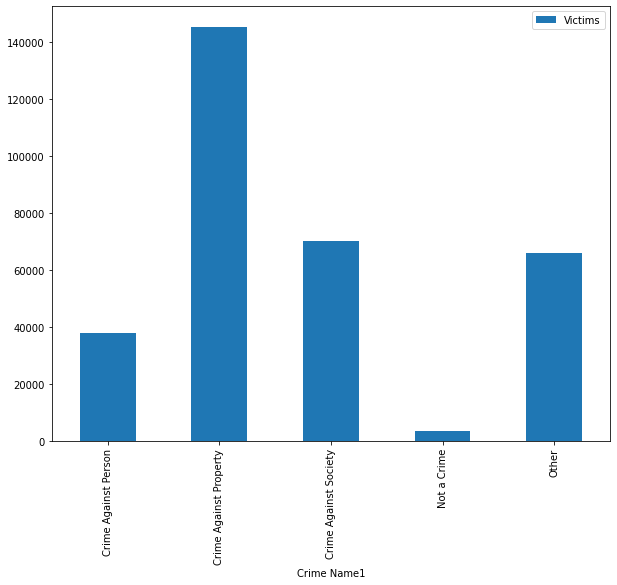

In [ ]:
crimeVictims.plot(kind='bar',x='Crime Name1', y='Victims', figsize=(10, 8))
plt.savefig('Victims claimed per Crime.png')

In [ ]:
districtIncidents = df.groupby(['Police District Name'])['Incident ID'].count()
districtIncidents = pd.DataFrame(districtIncidents)
districtIncidents = districtIncidents.reset_index(level=0)
districtIncidents.columns = ['Police District', 'Incidents']
districtIncidents

Police District  Incidents
0             BETHESDA      44305
1  CITY OF TAKOMA PARK       6408
2           GERMANTOWN      40425
3   MONTGOMERY VILLAGE      54326
4                OTHER        253
5            ROCKVILLE      42847
6        SILVER SPRING      66478
7          TAKOMA PARK       1545
8              WHEATON      59395

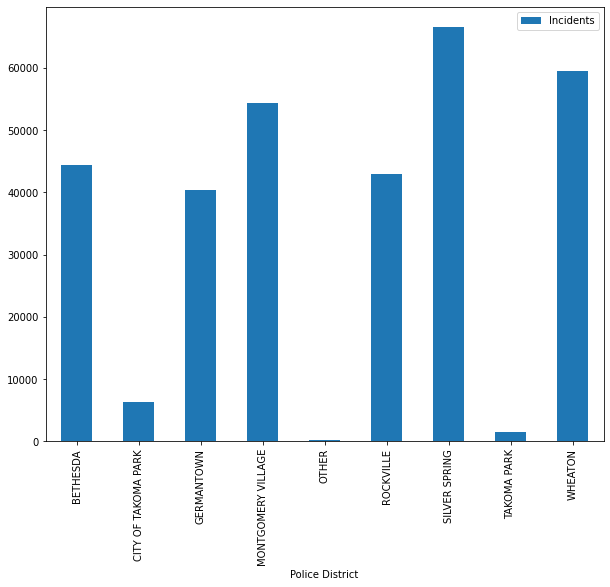

In [ ]:
districtIncidents.plot(kind='bar',x='Police District', y='Incidents', figsize=(10, 8))
plt.savefig('Number of Incidents in Police Districs.png')

In [ ]:
yearlyVictims = df.groupby([df.Start_Date_Time.dt.year])['Victims'].sum()
yearlyVictims = pd.DataFrame(yearlyVictims)
yearlyVictims = yearlyVictims.reset_index(level=0)
yearlyVictims.columns = ['Years', 'Victims']
yearlyVictims

Years  Victims
0   2016    28847
1   2017    57373
2   2018    55492
3   2019    52583
4   2020    45973
5   2021    44921
6   2022    38088

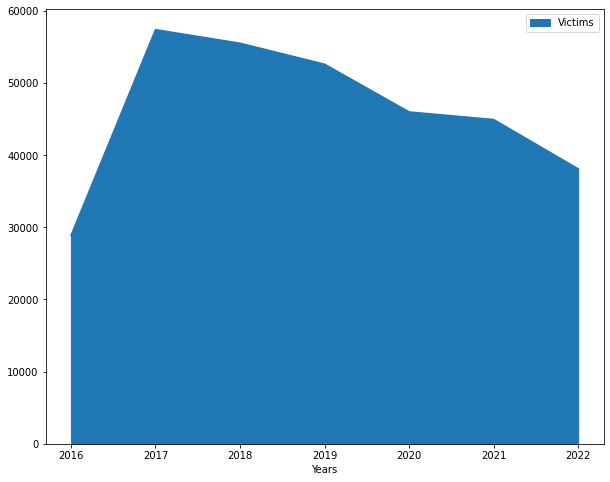

In [ ]:
yearlyVictims.plot(kind='area',x='Years', y='Victims', figsize=(10, 8))
plt.savefig('Number of Victims Yearly.png')

In [ ]:
Quarterly_Crimes = df.groupby('Quarters')[['Victims']].sum()
Quarterly_Crimes

Victims
Quarters         
Q1          42418
Q2          55741
Q3          98132
Q4         126986

## 2.4 Research Questions

### 2.4.1 Impacts of the Pandemic

### 2.4.1.1 Comparative analysis between crime rate during and post-pandemic period.

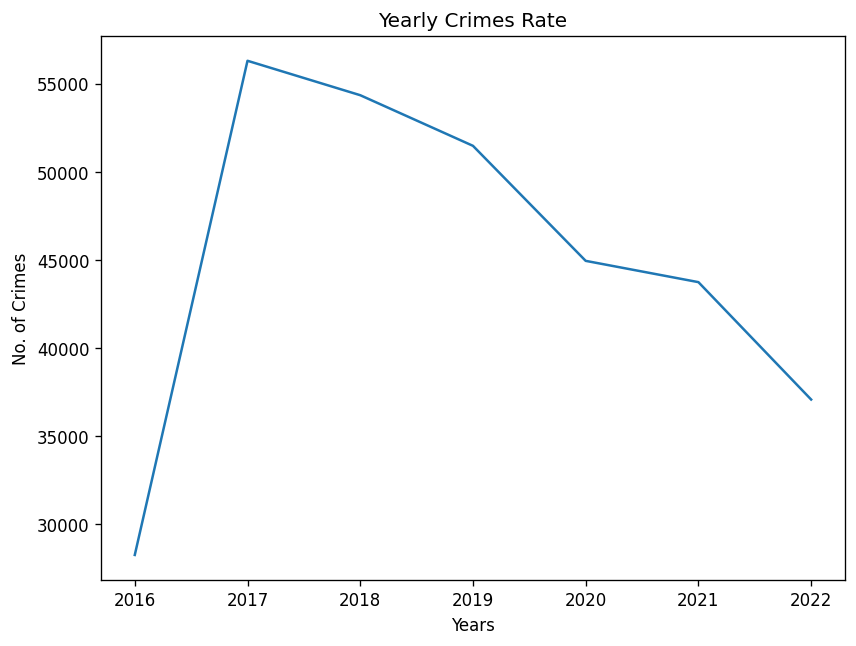

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=120)
plt.plot(Yearly_Crimes['Year'],Yearly_Crimes['No. Of Crimes'])
plt.title('Yearly Crimes Rate')
plt.xlabel('Years')
plt.ylabel('No. of Crimes')
plt.show()
plt.savefig('Yearly Crimes Rate.png')

### 2.4.1.2 Types of crimes that occurred during the pandemic

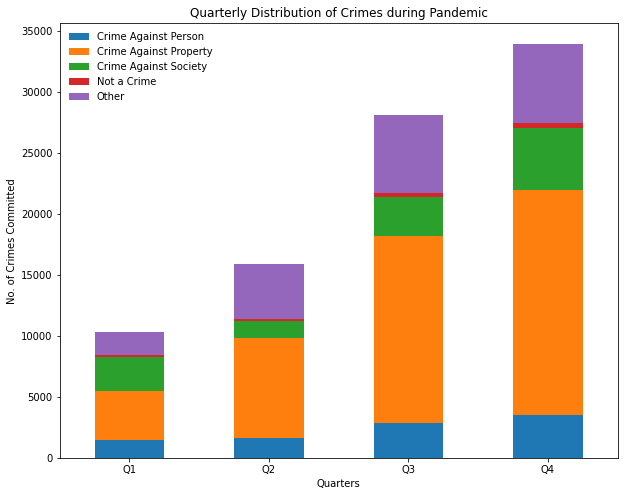

In [ ]:
covidCrime1.plot.bar(figsize=(10, 8), ylabel='No. of Crimes Committed', rot=0, stacked=True, title='Quarterly Distribution of Crimes during Pandemic')
plt.legend(frameon=False)
plt.savefig('Quarterly Distribution of Crimes during Pandemic.png')

## 2.4.2 Crime analysis

## 2.4.3 Location evaluation and Date/Time Insights

### 2.4.3.1  The most common crimes category reported during which interval of the Day

Text(0, 0.5, 'Count of crime')

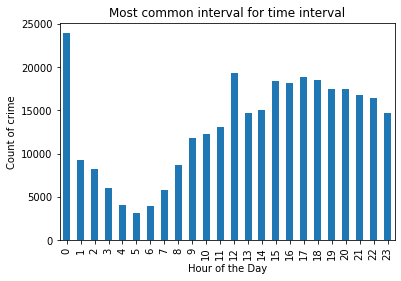

In [ ]:
from matplotlib import pyplot as plt
df_hour['Crime Name1'].plot(kind="bar", title="test")
plt.title("Most common interval for time interval")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of crime")

In [ ]:
##covidYears = df[['Years']]
##type(covidYears)

In [ ]:
##covidYears

In [ ]:
comparitive = df.groupby('Years')['Crime Name1'].value_counts().unstack()
comparitive

Crime Name1  Crime Against Person  Crime Against Property  \
Years                                                       
2016                         2498                   12438   
2017                         4967                   24268   
2018                         5131                   21652   
2019                         4950                   22030   
2020                         4429                   22958   
2021                         5067                   23139   
2022                         4272                   18773   

Crime Name1  Crime Against Society  Not a Crime  Other  
Years                                                   
2016                          7812          340   5157  
2017                         15861          683  10501  
2018                         15839          625  11083  
2019                         13048          639  10764  
2020                          7129          514   9809  
2021                          5445          395   9596  
2022                          4964          490   8525

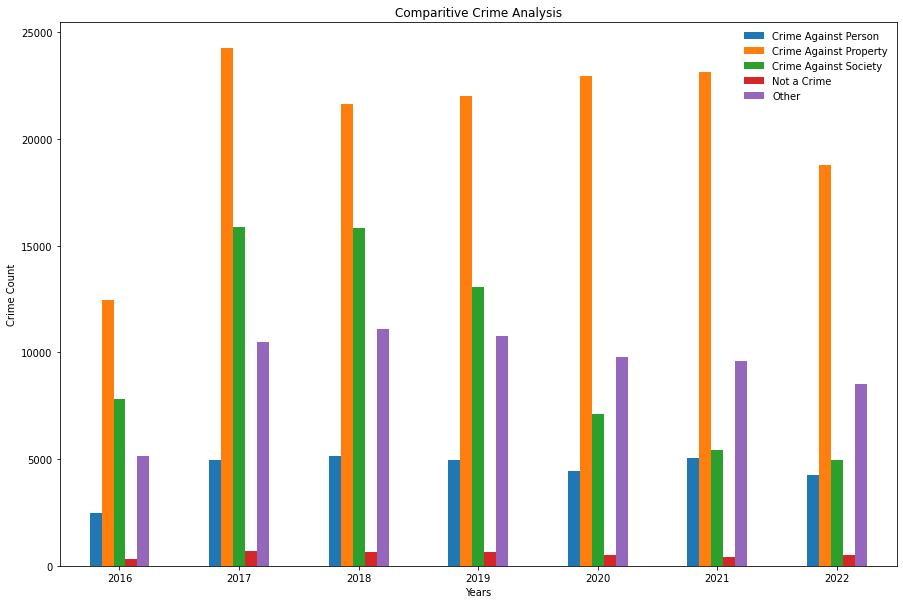

In [ ]:
comparitive.plot.bar(figsize=(15, 10),
                      ylabel='Crime Count',
                      rot=0,
                      stacked=False,
                      title='Comparitive Crime Analysis')
plt.legend(frameon=False)

In [ ]:
Yearly_Crimes = df.groupby(df.Start_Date_Time.dt.year)[['Incident ID']].count()
Yearly_Crimes = pd.DataFrame(Yearly_Crimes)
Yearly_Crimes = Yearly_Crimes.reset_index(level=0)
Yearly_Crimes.columns = ['Year', 'No. Of Crimes']
Yearly_Crimes

Year  No. Of Crimes
0  2016          28245
1  2017          56293
2  2018          54339
3  2019          51466
4  2020          44937
5  2021          43729
6  2022          37066

In [ ]:
covidData = df.loc[(df['Start_Date_Time'] >= '2020-01-01') & (df['Start_Date_Time'] <= '2021-12-30')]
##covidData

In [ ]:
covidQuarterCrimes = covidData.groupby(covidData.Quarters)[['Crime Name1']].count()
covidQuarterCrimes

Crime Name1
Quarters             
Q1              10276
Q2              15912
Q3              28142
Q4              33956

In [ ]:
covidCrime1 = covidData.groupby('Quarters')['Crime Name1'].value_counts().unstack()
covidCrime1

Crime Name1  Crime Against Person  Crime Against Property  \
Quarters                                                    
Q1                           1457                    4048   
Q2                           1620                    8169   
Q3                           2853                   15366   
Q4                           3545                   18416   

Crime Name1  Crime Against Society  Not a Crime  Other  
Quarters                                                
Q1                            2800          109   1862  
Q2                            1463          146   4514  
Q3                            3181          273   6469  
Q4                            5103          378   6514

In [ ]:
##selectedColumns = df[['OffenceCodeNew', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Quarters', 'Years',[Incident ID].count()]]
incidentColumn = df.groupby(['Incident ID'])
incidentColumn.first()

Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
Incident ID                                                              
201087096           2399   16033231                    None        23H   
201087097           2303   16033232                    None        23C   
201087100           1315   16033233                    None        13A   
201087102           3562   16033238                    None        35A   
201087104           5311   16033235                    None        90C   
...                  ...        ...                     ...        ...   
201396798           2399  220045654  10/18/2022 09:23:25 AM        23H   
201396803           2305  220045653  10/18/2022 09:18:38 AM        23F   
201396804           2304  220045657  10/18/2022 09:45:19 AM        23G   
201396808           9105  220045666  10/18/2022 10:24:48 AM        90Z   
201396814           2404  220045670  10/18/2022 10:36:44 AM        240   

             Victims             Crime Name1  \
Incident ID                                    
201087096          1  Crime Against Property   
201087097          1  Crime Against Property   
201087100          1    Crime Against Person   
201087102          1   Crime Against Society   
201087104          1   Crime Against Society   
...              ...                     ...   
201396798          1  Crime Against Property   
201396803          1  Crime Against Property   
201396804          1  Crime Against Property   
201396808          1                   Other   
201396814          1  Crime Against Property   

                                             Crime Name2  \
Incident ID                                                
201087096                              All other Larceny   
201087097                                    Shoplifting   
201087100                             Aggravated Assault   
201087102                       Drug/Narcotic Violations   
201087104                             Disorderly Conduct   
...                                                  ...   
201396798                              All other Larceny   
201396803                       Theft From Motor Vehicle   
201396804    Theft of Motor Vehicle Parts or Accessories   
201396808                             All Other Offenses   
201396814                            Motor Vehicle Theft   

                                   Crime Name3 Police District Name  \
Incident ID                                                           
201087096           LARCENY (DESCRIBE OFFENSE)           GERMANTOWN   
201087097                LARCENY - SHOPLIFTING              WHEATON   
201087100         ASSAULT - AGGRAVATED - OTHER           GERMANTOWN   
201087102          DRUGS - MARIJUANA - POSSESS        SILVER SPRING   
201087104    PUBLIC PEACE - DISORDERLY CONDUCT            ROCKVILLE   
...                                        ...                  ...   
201396798           LARCENY (DESCRIBE OFFENSE)           GERMANTOWN   
201396803                  LARCENY - FROM AUTO              WHEATON   
201396804                 LARCENY - AUTO PARTS            ROCKVILLE   
201396808                        LOST PROPERTY             BETHESDA   
201396814           AUTO THEFT - VEHICLE THEFT              WHEATON   

                          Block Address  ...     Start_Date_Time  \
Incident ID                              ...                       
201087096    19600 BLK  CRYSTAL ROCK DR  ... 2016-07-01 00:22:00   
201087097    13700 BLK  CONNECTICUT AVE  ... 2016-07-01 00:04:00   
201087100       19700 BLK  FREDERICK RD  ... 2016-07-01 00:32:00   
201087102    900 BLK  SILVER SPRING AVE  ... 2016-07-01 00:58:00   
201087104          1  BLK  MARYLAND AVE  ... 2016-07-01 00:57:00   
...                                 ...  ...                 ...   
201396798         11800 BLK  SKYLARK RD  ... 2022-10-09 00:00:00   
201396803       12600 BLK  HOLDRIDGE RD  ... 2022-10-18 03:57:00   
201396804       5500 BLK  ALDERBROOK CT

In [ ]:
gkk = df.groupby(['City', 'Crime Name1'])
gkk.first()

Incident ID Offence Code  CR Number  \
City     Crime Name1                                                   
0        Other                     201372982         5499  220016692   
ADELPHI  Crime Against Person      201089318         1399   16035798   
         Crime Against Society     201165954         9061  170547693   
         Other                     201137145         9199  170511236   
ASHTON   Crime Against Person      201331259         1199  210015692   
...                                      ...          ...        ...   
WHEATON  Crime Against Property    201380896         2404  220026286   
         Crime Against Society     201354303         3605  210047234   
         Other                     201352801         9109  210045737   
WOODBINE Crime Against Property    201134136         2099  170507557   
         Other                     201094714         9199   16042643   

                                   Dispatch Date / Time NIBRS Code  Victims  \
City     Crime Name1                                                          
0        Other                   04/19/2022 11:34:03 PM        90Z        1   
ADELPHI  Crime Against Person                      None        13B        2   
         Crime Against Society   12/10/2017 04:18:33 AM        90Z        1   
         Other                   06/01/2017 09:21:33 PM        90Z        1   
ASHTON   Crime Against Person    04/27/2021 04:12:01 PM        11D        1   
...                                                 ...        ...      ...   
WHEATON  Crime Against Property  06/18/2022 01:03:59 PM        240        1   
         Crime Against Society   11/20/2021 11:19:45 PM        90C        1   
         Other                   11/11/2021 03:45:33 PM        90Z        1   
WOODBINE Crime Against Property  05/12/2017 11:30:40 PM        200        1   
         Other                   11/08/2018 05:13:47 PM        90Z        1   

                                         Crime Name2  \
City     Crime Name1                                   
0        Other                        NOT NIBRS CODE   
ADELPHI  Crime Against Person         Simple Assault   
         Crime Against Society    All Other Offenses   
         Other                    All Other Offenses   
ASHTON   Crime Against Person               Fondling   
...                                              ...   
WHEATON  Crime Against Property  Motor Vehicle Theft   
         Crime Against Society    All Other Offenses   
         Other                    All Other Offenses   
WOODBINE Crime Against Property                Arson   
         Other                    All Other Offenses   

                                                         Crime Name3  \
City     Crime Name1                                                   
0        Other                   TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
ADELPHI  Crime Against Person                   ASSAULT - 2ND DEGREE   
         Crime Against Society         FUGITIVE FROM MD JURISDICTION   
         Other                                    POLICE INFORMATION   
ASHTON   Crime Against Person                 SEX ASSAULT - FONDLING   
...                                                              ...   
WHEATON  Crime Against Property           AUTO THEFT - VEHICLE THEFT   
         Crime Against Society       SEX OFFENSE - INDECENT EXPOSURE   
         Other                            RECOVERED PROPERTY - OTHER   
WOODBINE Crime Against Property             ARSON (DESCRIBE OFFENSE)   
         Other                                    POLICE INFORMATION   

                                Police District Name  \
City     Crime Name1                                   
0        Other                    MONTGOMERY VILLAGE   
ADELPHI  Crime Against Person                  OTHER   
         Crime Against Society           TAKOMA PARK   
         Other                         SILVER SPRING   
ASHTON   Crime Against Person                WHEATON   
...       

In [ ]:
##df.groupby(df.Start_Date_Time.dt.hour)[['Crime Name1']].count()
hours=df.Start_Date_Time.dt.hour
df['hours']=hours
df_hour=df.groupby(hours)[['Crime Name1']].count()
df_hour['Crime Name1'].dtypes

dtype('int64')

In [ ]:
datatypes = df_hour.dtypes

In [ ]:
df_hour

Crime Name1
Start_Date_Time             
0                      23940
1                       9252
2                       8216
3                       6039
4                       4063
5                       3076
6                       3883
7                       5810
8                       8697
9                      11814
10                     12232
11                     13056
12                     19262
13                     14731
14                     15008
15                     18332
16                     18106
17                     18856
18                     18506
19                     17407
20                     17497
21                     16820
22                     16454
23                     14734

In [ ]:
datatypes

Crime Name1    int64
dtype: object

In [ ]:
df_hour.to_csv('df_hour.csv') 

In [ ]:
df_hour = pd.read_csv('df_hour.csv')

In [ ]:
df_hour

Start_Date_Time  Crime Name1
0                 0        23940
1                 1         9252
2                 2         8216
3                 3         6039
4                 4         4063
5                 5         3076
6                 6         3883
7                 7         5810
8                 8         8697
9                 9        11814
10               10        12232
11               11        13056
12               12        19262
13               13        14731
14               14        15008
15               15        18332
16               16        18106
17               17        18856
18               18        18506
19               19        17407
20               20        17497
21               21        16820
22               22        16454
23               23        14734

In [ ]:
crimesInLocation = df.groupby(['Latitude', 'Longitude'])[['Crime Name1']].count()
crimesInLocation = pd.DataFrame(crimesInLocation)
crimesInLocation = crimesInLocation.reset_index(level=0)
# crimesInLocation.columns = ['Latitude', 'Longitude' , 'Crimes']
crimesInLocation

Latitude  Crime Name1
Longitude                         
 0.000000    0.000000         8635
-77.118390  38.938410            2
-77.118900  38.938980            1
-77.118835  38.939011            4
-77.119330  38.940604            2
...               ...          ...
-77.190599  39.342046            3
-77.190599  39.342046            2
-77.190631  39.342086            1
-77.190600  39.342140            1
-62.372081  90.000000            1

[47833 rows x 2 columns]

In [ ]:
crimesInLocation.to_csv('df_crimesInLocation.csv')

In [ ]:
df1=pd.read_csv('df_crimesInLocation.csv')

In [ ]:
df1

Longitude   Latitude  Crime Name1
0       0.000000   0.000000         8635
1     -77.118390  38.938410            2
2     -77.118900  38.938980            1
3     -77.118835  38.939011            4
4     -77.119330  38.940604            2
...          ...        ...          ...
47828 -77.190599  39.342046            3
47829 -77.190599  39.342046            2
47830 -77.190631  39.342086            1
47831 -77.190600  39.342140            1
47832 -62.372081  90.000000            1

[47833 rows x 3 columns]

In [ ]:
df

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
1         201301798         5016  200035833  09/13/2020 12:26:58 AM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
1             90Z        1   Crime Against Society   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
1                             All Other Offenses   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                       Crime Name3 Police District Name  ...  \
0                             ROBBERY - STREET-GUN              WHEATON  ...   
1       OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2               DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                          LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                            LARCENY - SHOPLIFTING           GERMANTOWN  ...   
...                                            ...                  ...  ...   
316070                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071           PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                         LARCENY - FROM BLDG        SILVER SPRING  ...   
316073                   DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074         BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

             End_Date_Time   Latitude  Longitude  Police District Number  \
0                      NaT  39.036270 -77.049900                      4D   
1      2020-08-08 00:00:00  39.277840 -77.211500                      5D   
2      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
3      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
4                      NaT  39.198295 -77.244900                      5D   
...                    ...        ...        ...                     ...   
316070                 NaT  39.146870 -77.192600                      6D   
316071                 NaT  39.136580 -77.208400                      6D   
316072 2022-10-17 13:58:00  38.997150 -76.993100                      3D   
316073 2022-10-17 06:35:00  39.104970 -77.190500                      6D   
316074 2022-10-16 12:30:00  39.084560 -76.957100                      3D   

       

### 2.4.3.2 Most common areas of Crimes Occurrences (Location /LatLng)

In [ ]:
fig = px.density_mapbox(df1, lat='Latitude', lon='Longitude',z='Crime Name1',
                        mapbox_style="stamen-terrain")
fig

In [ ]:
cityAgencies = df.groupby('City')['Agency'].value_counts()
cityAgencies = cityAgencies.sort_values(ascending=False).head(n=5)
cityAgencies = pd.DataFrame(cityAgencies)
cityAgencies = cityAgencies.reset_index(level=0)
cityAgencies.columns = ['Cities', 'Agencies']
cityAgencies

Cities  Agencies
Agency                         
MCPD    SILVER SPRING    108369
MCPD       GERMANTOWN     30782
MCPD     GAITHERSBURG     29208
MCPD        ROCKVILLE     27570
MCPD         BETHESDA     21957

In [ ]:
topDangerousCities = df.loc[df['City'].isin(['SILVER SPRING', 'GAITHERSBURG', 'ROCKVILLE', 'GERMANTOWN', 'BETHESDA'])]
topDangerousCities

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
5         201302822         1103  200036477                     NaN   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
5             11A        1    Crime Against Person   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
5                                  Forcible Rape   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                Crime Name3 Police District Name  ...  \
0                      ROBBERY - STREET-GUN              WHEATON  ...   
2        DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                   LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                     LARCENY - SHOPLIFTING           GERMANTOWN  ...   
5                         RAPE - STRONG-ARM   MONTGOMERY VILLAGE  ...   
...                                     ...                  ...  ...   
316070                 ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071    PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                  LARCENY - FROM BLDG        SILVER SPRING  ...   
316073            DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074  BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

             End_Date_Time   Latitude  Longitude  Police District Number  \
0                      NaT  39.036270 -77.049900                      4D   
2      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
3      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
4                      NaT  39.198295 -77.244900                      5D   
5                      NaT  39.168194 -77.175049                      6D   
...                    ...        ...        ...                     ...   
316070                 NaT  39.146870 -77.192600                      6D   
316071                 NaT  39.136580 -77.208400                      6D   
316072 2022-10-17 13:58:00  38.997150 -76.993100                      3D   
316073 2022-10-17 06:35:00  39.104970 -77.190500                      6D   
316074 2022-10-16 12:30:00  39.084560 -76.957100                      3D   

                   Location       Durations OffenceCodeNew Quarters Years  \
0       (39.03

In [ ]:
topDangerousCities2 = topDangerousCities.loc[topDangerousCities['Start_Date_Time'] < topDangerousCities['Dispatch Date / Time']]
topDangerousCities2

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
6         201230089         4004  190010482  03/06/2019 04:23:43 PM   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
6             40A        1   Crime Against Society   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
6                                   Prostitution   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                Crime Name3 Police District Name  ...  \
0                      ROBBERY - STREET-GUN              WHEATON  ...   
2        DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                   LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                     LARCENY - SHOPLIFTING           GERMANTOWN  ...   
6               COMM SEX OFF - PROSTITUTION            ROCKVILLE  ...   
...                                     ...                  ...  ...   
316070                 ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071    PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                  LARCENY - FROM BLDG        SILVER SPRING  ...   
316073            DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074  BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

             End_Date_Time   Latitude  Longitude  Police District Number  \
0                      NaT  39.036270 -77.049900                      4D   
2      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
3      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
4                      NaT  39.198295 -77.244900                      5D   
6      2019-07-24 23:30:00  39.103443 -77.155941                      1D   
...                    ...        ...        ...                     ...   
316070                 NaT  39.146870 -77.192600                      6D   
316071                 NaT  39.136580 -77.208400                      6D   
316072 2022-10-17 13:58:00  38.997150 -76.993100                      3D   
316073 2022-10-17 06:35:00  39.104970 -77.190500                      6D   
316074 2022-10-16 12:30:00  39.084560 -76.957100                      3D   

                   Location         Durations OffenceCodeNew Quarters Years  \
0       (39.

In [ ]:
from datetime import datetime
topDangerousCities2['Dispatch Date / Time'] = pd.to_datetime(topDangerousCities2['Dispatch Date / Time']) 
responceTime = (topDangerousCities2['Dispatch Date / Time'] - topDangerousCities2['Start_Date_Time']).dt.total_seconds()/3600
responceTime

<ipython-input-99-8300050d0b77>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0           0.003611
2           0.013056
3           0.013056
4           0.013889
6         148.395278
             ...    
316070      0.009722
316071      0.010556
316072      8.258333
316073     34.054167
316074    216.450000
Length: 190643, dtype: float64

### 2.4.3.3  Most crime occurrences during which quarter of the day


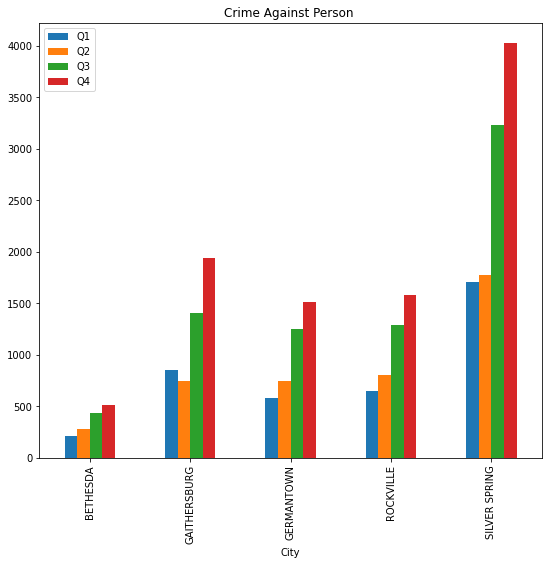

<Figure size 432x288 with 0 Axes>

In [ ]:
cap_df.plot(x="City", y=["Q1", "Q2","Q3","Q4"], kind="bar",title='Crime Against Person ',figsize=(9, 8))
 
# print bar graph
mp.show()
mp.savefig('crimeagainstperson_quarters.png')

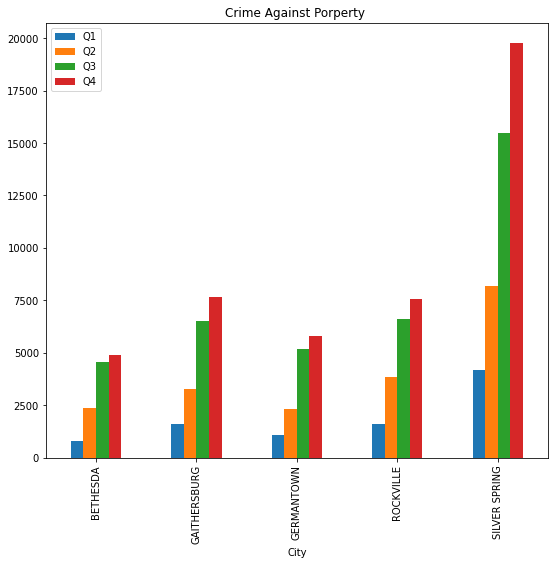

<Figure size 432x288 with 0 Axes>

In [ ]:
capropety_df.plot(x="City", y=["Q1", "Q2","Q3","Q4"], kind="bar",title='Crime Against Porperty ',figsize=(9, 8))
 
# print bar graph
mp.show()
mp.savefig('crimeagainstproperty_quarters.png')

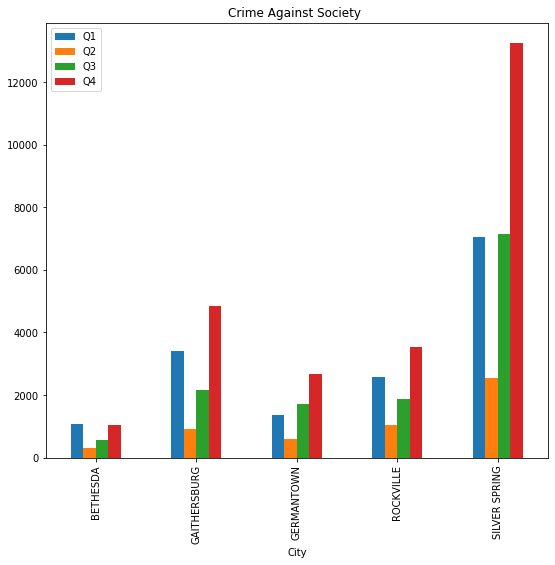

<Figure size 432x288 with 0 Axes>

In [ ]:
cas_df.plot(x="City", y=["Q1", "Q2","Q3","Q4"], kind="bar",title='Crime Against Society ',figsize=(9, 8))
 
# print bar graph
mp.show()
mp.savefig('crimeagainstsociety_quarters.png')

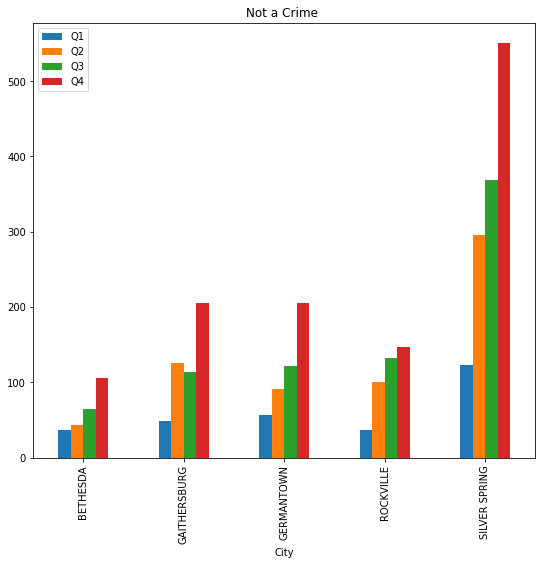

<Figure size 432x288 with 0 Axes>

In [ ]:
NAC_df.plot(x="City", y=["Q1", "Q2","Q3","Q4"], kind="bar",title='Not a Crime ',figsize=(9, 8))
 
# print bar graph
mp.show()
mp.savefig('Not a crime_quarters.png')

In [ ]:
topDangerousCities2['Response Time(Hours)'] = responceTime
topDangerousCities2

<ipython-input-100-1717656e4dc5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Incident ID Offence Code  CR Number Dispatch Date / Time NIBRS Code  \
0         201219928         1204  180063894  2018-12-21 21:13:13        120   
2         201221577         5404  190000342  2019-01-03 02:48:47        90D   
3         201221577         9053  190000342  2019-01-03 02:48:47        90Z   
4         201294935         2303  200027681  2020-07-16 17:29:50        23C   
6         201230089         4004  190010482  2019-03-06 16:23:43        40A   
...             ...          ...        ...                  ...        ...   
316070    201396480         1399  220045185  2022-10-15 04:18:35        13B   
316071    201396722         5311  220045559  2022-10-17 15:29:38        90C   
316072    201396745         2308  220045619  2022-10-17 20:45:30        23D   
316073    201396630         2902  220045457  2022-10-17 07:03:15        290   
316074    201396568         2202  220045390  2022-10-16 16:27:00        220   

        Victims             Crime Name1  \
0             1  Crime Against Property   
2             1   Crime Against Society   
3             1                   Other   
4             1  Crime Against Property   
6             1   Crime Against Society   
...         ...                     ...   
316070        1    Crime Against Person   
316071        1   Crime Against Society   
316072        1  Crime Against Property   
316073        1  Crime Against Property   
316074        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
6                                   Prostitution   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                Crime Name3 Police District Name  ...  \
0                      ROBBERY - STREET-GUN              WHEATON  ...   
2        DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                   LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                     LARCENY - SHOPLIFTING           GERMANTOWN  ...   
6               COMM SEX OFF - PROSTITUTION            ROCKVILLE  ...   
...                                     ...                  ...  ...   
316070                 ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071    PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                  LARCENY - FROM BLDG        SILVER SPRING  ...   
316073            DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074  BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

         Latitude  Longitude Police District Number             Location  \
0       39.036270 -77.049900                     4D  (39.0363, -77.0499)   
2       39.086688 -77.144754                     1D  (39.0867, -77.1448)   
3       39.086688 -77.144754                     1D  (39.0867, -77.1448)   
4       39.198295 -77.244900                     5D  (39.1983, -77.2449)   
6       39.103443 -77.155941                     1D  (39.1034, -77.1559)   
...           ...        ...                    ...                  ...   
316070  39.146870 -77.192600                     6D  (39.1469, -77.1926)   
316071  39.136580 -77.208400                     6D  (39.1366, -77.2084)   
316072  38.997150 -76.993100                     3D  (38.9971, -76.9931)   
316073  39.104970 -77.190500                     6D   (39.105, -77.1905)   
316074  39.084560 -76.957100                     3D  (39.0846, -76.9571)   

               Durations OffenceCodeNew Quarters Years hours  \
0                    NaT       1204-120       Q4  2018    21   

### 2.4.3.4 Response Time Breakdown for Top Agences

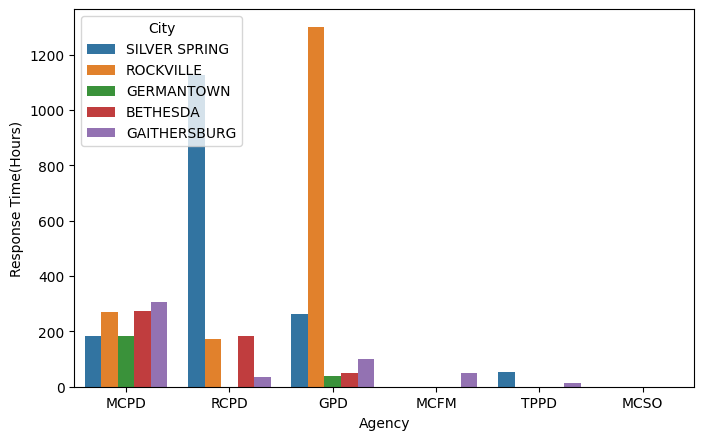

In [ ]:
figure(figsize=(8,5), dpi=100)
sns.barplot(data=topDangerousCities2, x='Agency', y='Response Time(Hours)', hue='City', ci=None)

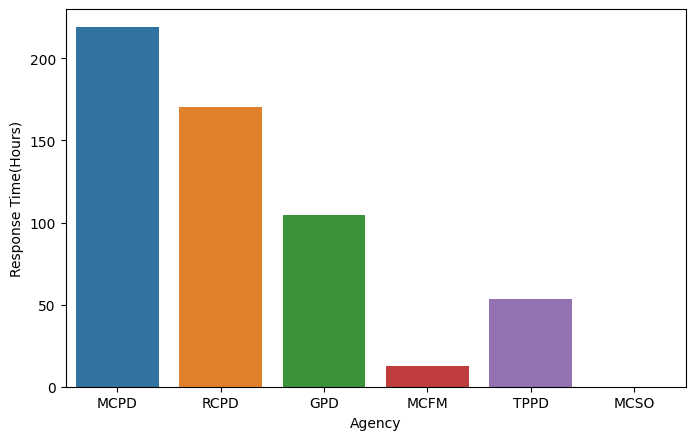

In [ ]:
figure(figsize=(8,5), dpi=100)
sns.barplot(data=topDangerousCities2, x='Agency', y='Response Time(Hours)', ci=None)

In [ ]:
topDangerousCities2.groupby('Agency')['Response Time(Hours)'].describe()

count        mean          std       min       25%       50%  \
Agency                                                                    
GPD      12235.0  104.783691   954.737473  0.000278  0.007222  0.014444   
MCFM       297.0   12.789372   215.769696  0.000278  0.004167  0.008333   
MCPD    164632.0  219.019357  1513.744231  0.000278  0.010000  0.345556   
MCSO         2.0    0.006667     0.000786  0.006111  0.006389  0.006667   
RCPD     13232.0  170.498854  1222.700675  0.000278  0.010833  0.263750   
TPPD       245.0   53.140948   259.475837  0.000556  0.009444  0.134444   

              75%           max  
Agency                           
GPD      1.886944  43053.572778  
MCFM     0.013889   3718.619167  
MCPD    20.352292  53460.741667  
MCSO     0.006944      0.007222  
RCPD    15.047986  44952.005000  
TPPD    14.584167   2760.013611

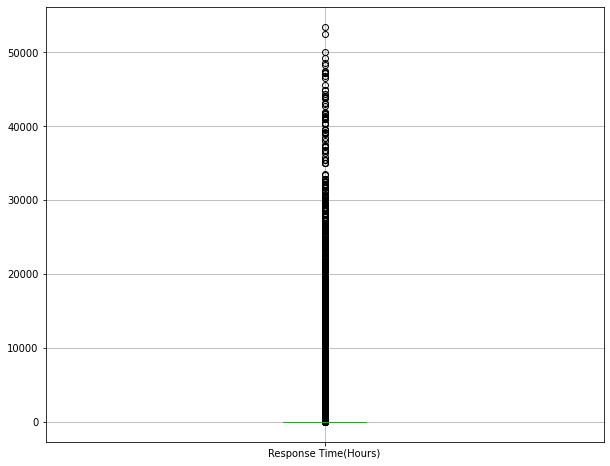

In [ ]:
topDangerousCities2.boxplot(column=['Response Time(Hours)'], return_type='axes', figsize=(10, 8))

In [ ]:
##dfQuarters = df.get('Quarters')
dfQuarters=df.groupby(['City', 'Crime Name1','Quarters'])['Incident ID'].count()
type(dfQuarters)

pandas.core.series.Series

In [ ]:
df2 = pd.DataFrame(dfQuarters)
df2.columns

Index(['Incident ID'], dtype='object')

In [ ]:
df2.to_csv('df2.csv')

In [ ]:
df2 = pd.read_csv('df2.csv')

In [ ]:
df2

City             Crime Name1 Quarters  Incident ID
0           0                   Other       Q4            1
1     ADELPHI    Crime Against Person       Q4            1
2     ADELPHI   Crime Against Society       Q1            1
3     ADELPHI   Crime Against Society       Q4            1
4     ADELPHI                   Other       Q3            1
..        ...                     ...      ...          ...
636   WHEATON                   Other       Q4            1
637  WOODBINE  Crime Against Property       Q3            1
638  WOODBINE  Crime Against Property       Q4            2
639  WOODBINE                   Other       Q2            1
640  WOODBINE                   Other       Q3            3

[641 rows x 4 columns]

In [ ]:
##df2['Incident ID'].sort(reverse=True)
sorted(df2['Incident ID'], reverse=True)

[19752,
 15462,
 13239,
 8202,
 7677,
 7569,
 7150,
 7048,
 6768,
 6604,
 6508,
 6186,
 5807,
 5174,
 4878,
 4853,
 4571,
 4431,
 4183,
 4024,
 3874,
 3840,
 3613,
 3545,
 3392,
 3325,
 3292,
 3228,
 3064,
 2684,
 2572,
 2564,
 2537,
 2344,
 2292,
 2225,
 2145,
 1962,
 1938,
 1891,
 1885,
 1883,
 1849,
 1772,
 1707,
 1702,
 1692,
 1652,
 1623,
 1606,
 1606,
 1585,
 1583,
 1556,
 1539,
 1511,
 1406,
 1353,
 1328,
 1309,
 1288,
 1260,
 1247,
 1170,
 1110,
 1105,
 1095,
 1068,
 1064,
 1043,
 1040,
 1013,
 1006,
 916,
 901,
 876,
 854,
 846,
 843,
 801,
 795,
 784,
 749,
 740,
 739,
 731,
 711,
 700,
 692,
 690,
 680,
 673,
 655,
 645,
 626,
 622,
 619,
 593,
 578,
 574,
 571,
 570,
 562,
 558,
 556,
 550,
 547,
 544,
 537,
 515,
 507,
 506,
 497,
 476,
 459,
 453,
 451,
 446,
 441,
 434,
 430,
 427,
 426,
 413,
 405,
 404,
 395,
 377,
 372,
 368,
 364,
 364,
 363,
 363,
 361,
 361,
 352,
 341,
 337,
 322,
 309,
 309,
 307,
 306,
 297,
 295,
 293,
 291,
 281,
 275,
 275,
 273,
 270,
 268,


In [ ]:
sorted_df2 = df2.sort_values(by=['Incident ID'], ascending=False)
sorted_df2 = sorted_df2.rename({'Incident ID': 'Incidents'}, axis='columns')
sorted_df2 = sorted_df2.head(n=10)
sorted_df2

City             Crime Name1 Quarters  Incidents
562  SILVER SPRING  Crime Against Property       Q4      19752
561  SILVER SPRING  Crime Against Property       Q3      15462
566  SILVER SPRING   Crime Against Society       Q4      13239
560  SILVER SPRING  Crime Against Property       Q2       8202
292   GAITHERSBURG  Crime Against Property       Q4       7677
521      ROCKVILLE  Crime Against Property       Q4       7569
565  SILVER SPRING   Crime Against Society       Q3       7150
563  SILVER SPRING   Crime Against Society       Q1       7048
574  SILVER SPRING                   Other       Q4       6768
520      ROCKVILLE  Crime Against Property       Q3       6604

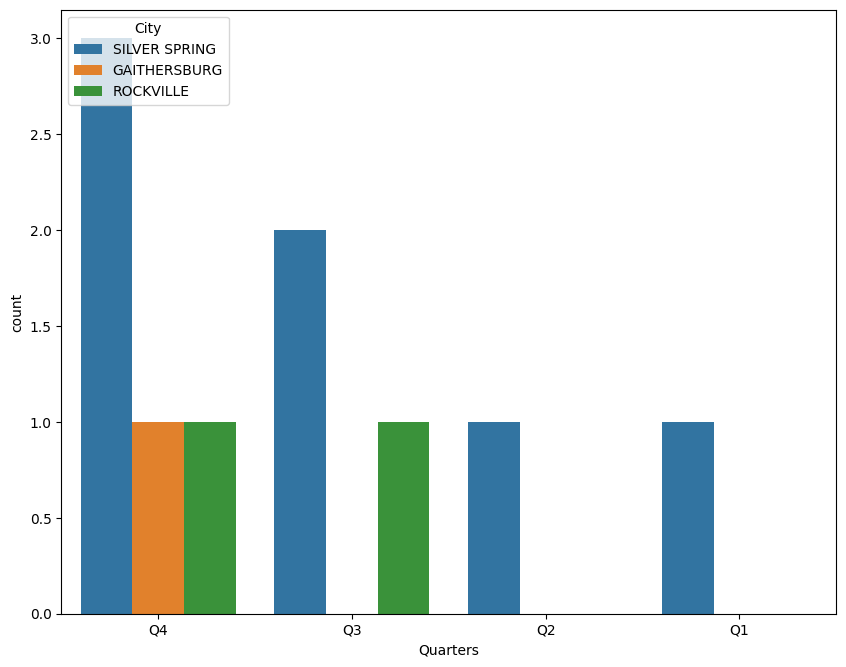

In [ ]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=sorted_df2, x='Quarters', hue='City')

In [ ]:
sorted_df2['Quarters'] = sorted_df2['Quarters'].replace({'Q1': 1, 'Q2' : 2, 'Q3' : 3, 'Q4': 4})
sorted_df2

City             Crime Name1  Quarters  Incidents
562  SILVER SPRING  Crime Against Property         4      19752
561  SILVER SPRING  Crime Against Property         3      15462
566  SILVER SPRING   Crime Against Society         4      13239
560  SILVER SPRING  Crime Against Property         2       8202
292   GAITHERSBURG  Crime Against Property         4       7677
521      ROCKVILLE  Crime Against Property         4       7569
565  SILVER SPRING   Crime Against Society         3       7150
563  SILVER SPRING   Crime Against Society         1       7048
574  SILVER SPRING                   Other         4       6768
520      ROCKVILLE  Crime Against Property         3       6604

In [ ]:
mostReportedIncidentPlaces = df.groupby(['Place'])[['Incident ID']].count()
mostReportedIncidentPlaces = pd.DataFrame(mostReportedIncidentPlaces)
mostReportedIncidentPlaces = mostReportedIncidentPlaces.sort_values(by=['Incident ID'], ascending=False)
mostReportedIncidentPlaces = mostReportedIncidentPlaces.reset_index(level=0)
mostReportedIncidentPlaces.columns = ['Places', 'Incidents']
mostReportedIncidentPlaces

Places  Incidents
0                 Street - In vehicle      34218
1           Residence - Single Family      33466
2         Residence - Apartment/Condo      30221
3                       Other/Unknown      26403
4                Street - Residential      20837
..                                ...        ...
94                     Amusement Park          4
95                    Industrial Site          4
96                  Camp / Campground          2
97                          Rest Area          2
98  Dock/Wharf/Freight/Modal Terminal          2

[99 rows x 2 columns]

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

### 2.4.3.5 Most common places where incidents occurred

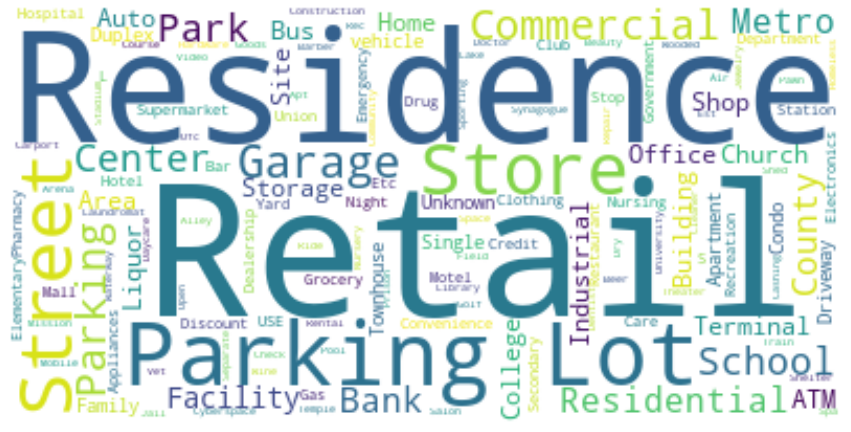

In [ ]:
Places = " ".join(i for i in mostReportedIncidentPlaces.Places)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Places)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

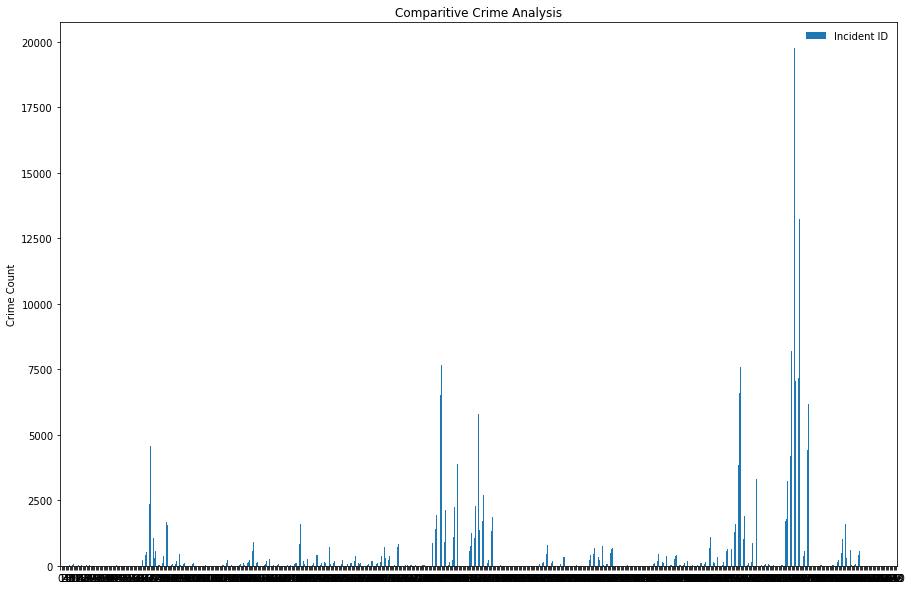

In [ ]:
df2.plot.bar(figsize=(15, 10),
                      ylabel='Crime Count',
                      rot=0,
                      stacked=False,
                      title='Comparitive Crime Analysis')
plt.legend(frameon=False)

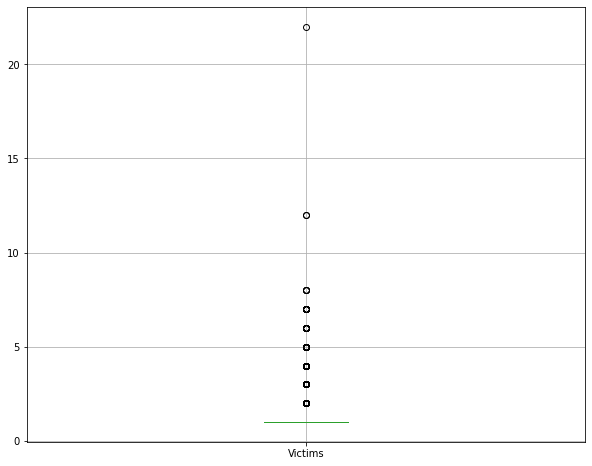

In [ ]:
df.boxplot(column=['Victims'], return_type='axes', figsize=(10, 8))
plt.savefig('Victims BoxPlot.png')

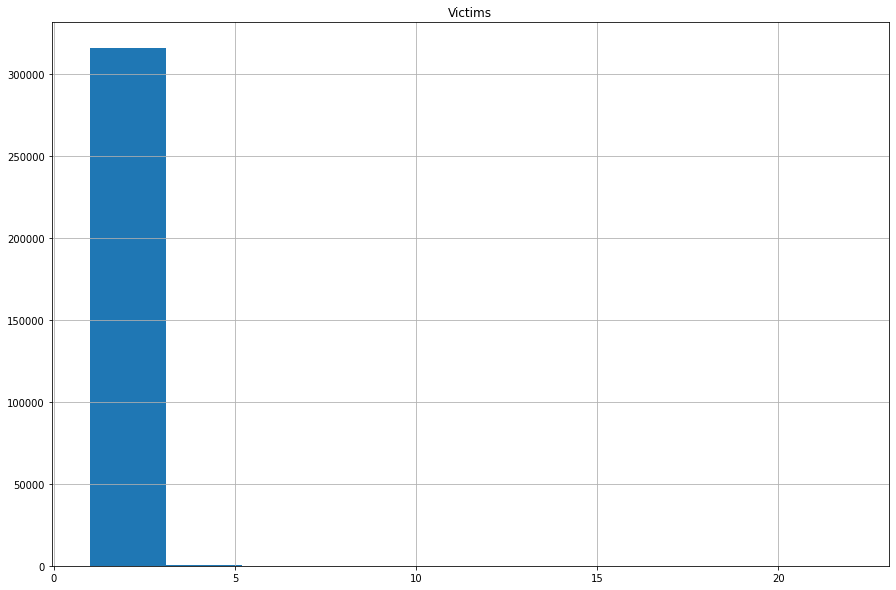

In [ ]:
features = ['Victims','Police District Number']
df[features].hist(figsize=(15, 10));

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



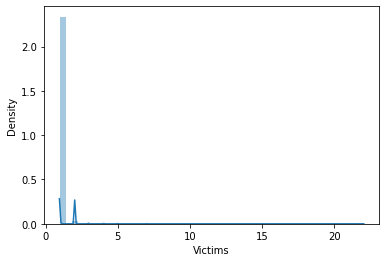

In [ ]:
sns.distplot(df["Victims"]);

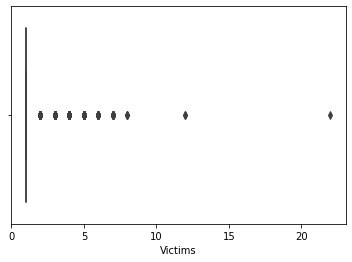

In [ ]:
sns.boxplot(x="Victims", data=df);

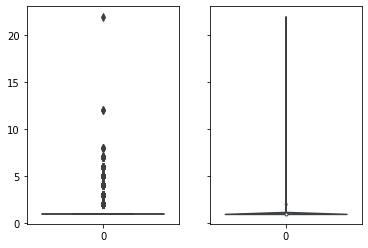

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Victims"], ax=axes[0])
sns.violinplot(data=df["Victims"], ax=axes[1]);

In [ ]:
df['Victims'].value_counts().unique()

array([310267,   4911,    594,    202,     60,     18,     16,      4,
            2,      1])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



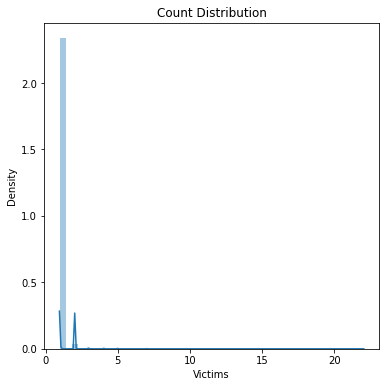

In [ ]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(df['Victims'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



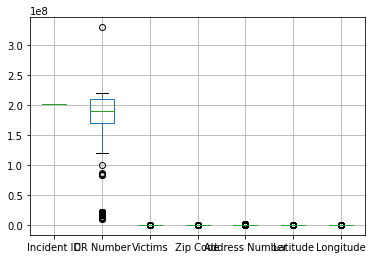

In [ ]:
import matplotlib.pyplot as plt
numeric_features.boxplot()

df["Churn"].value_counts()

In [ ]:
df['Crime Name2'].value_counts()

All Other Offenses                             74903
Theft From Motor Vehicle                       27088
Drug/Narcotic Violations                       23540
Simple Assault                                 21785
Destruction/Damage/Vandalism of Property       19598
Shoplifting                                    16827
Driving Under the Influence                    15186
All other Larceny                              14475
Theft from Building                            11605
Burglary/Breaking and Entering                  9024
Identity Theft                                  8957
Theft of Motor Vehicle Parts or Accessories     7169
Motor Vehicle Theft                             6843
False Pretenses/Swindle/Confidence Game         6670
Liquor Law Violations                           6653
Disorderly Conduct                              5054
Credit Card/Automatic Teller Machine Fraud      4987
Aggravated Assault                              4499
Trespass of Real Property                     

In [ ]:
df['Crime Name1'].value_counts()

Crime Against Property    145258
Crime Against Society      70098
Other                      65435
Crime Against Person       31314
Not a Crime                 3686
Name: Crime Name1, dtype: int64

In [ ]:
topDangerousCities = df.loc[df['City'].isin(['SILVER SPRING', 'GAITHERSBURG', 'ROCKVILLE', 'GERMANTOWN', 'BETHESDA'])]
topDangerousCities

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201219928         1204  180063894  12/21/2018 09:13:13 PM   
2         201221577         5404  190000342  01/03/2019 02:48:47 AM   
3         201221577         9053  190000342  01/03/2019 02:48:47 AM   
4         201294935         2303  200027681  07/16/2020 05:29:50 PM   
5         201302822         1103  200036477                     NaN   
...             ...          ...        ...                     ...   
316070    201396480         1399  220045185  10/15/2022 04:18:35 AM   
316071    201396722         5311  220045559  10/17/2022 03:29:38 PM   
316072    201396745         2308  220045619  10/17/2022 08:45:30 PM   
316073    201396630         2902  220045457  10/17/2022 07:03:15 AM   
316074    201396568         2202  220045390  10/16/2022 04:27:00 PM   

       NIBRS Code  Victims             Crime Name1  \
0             120        1  Crime Against Property   
2             90D        1   Crime Against Society   
3             90Z        1                   Other   
4             23C        1  Crime Against Property   
5             11A        1    Crime Against Person   
...           ...      ...                     ...   
316070        13B        1    Crime Against Person   
316071        90C        1   Crime Against Society   
316072        23D        1  Crime Against Property   
316073        290        1  Crime Against Property   
316074        220        1  Crime Against Property   

                                     Crime Name2  \
0                                        Robbery   
2                    Driving Under the Influence   
3                             All Other Offenses   
4                                    Shoplifting   
5                                  Forcible Rape   
...                                          ...   
316070                            Simple Assault   
316071                        Disorderly Conduct   
316072                       Theft from Building   
316073  Destruction/Damage/Vandalism of Property   
316074            Burglary/Breaking and Entering   

                                Crime Name3 Police District Name  ...  \
0                      ROBBERY - STREET-GUN              WHEATON  ...   
2        DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                   LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                     LARCENY - SHOPLIFTING           GERMANTOWN  ...   
5                         RAPE - STRONG-ARM   MONTGOMERY VILLAGE  ...   
...                                     ...                  ...  ...   
316070                 ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
316071    PUBLIC PEACE - DISORDERLY CONDUCT   MONTGOMERY VILLAGE  ...   
316072                  LARCENY - FROM BLDG        SILVER SPRING  ...   
316073            DAMAGE PROPERTY - PRIVATE   MONTGOMERY VILLAGE  ...   
316074  BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING  ...   

             End_Date_Time   Latitude  Longitude  Police District Number  \
0                      NaT  39.036270 -77.049900                      4D   
2      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
3      2019-01-03 02:48:00  39.086688 -77.144754                      1D   
4                      NaT  39.198295 -77.244900                      5D   
5                      NaT  39.168194 -77.175049                      6D   
...                    ...        ...        ...                     ...   
316070                 NaT  39.146870 -77.192600                      6D   
316071                 NaT  39.136580 -77.208400                      6D   
316072 2022-10-17 13:58:00  38.997150 -76.993100                      3D   
316073 2022-10-17 06:35:00  39.104970 -77.190500                      6D   
316074 2022-10-16 12:30:00  39.084560 -76.957100                      3D   

                   Location       Durations OffenceCodeNew Quarters Years  \
0       (39.03

In [ ]:
citiesGroup = topDangerousCities.groupby(['Crime Name1', 'Quarters'])['City'].value_counts().unstack()
citiesGroup = pd.DataFrame(citiesGroup)
citiesGroup = citiesGroup.transpose()
citiesGroup = citiesGroup.reset_index(level=0)
#citiesCrime1.columns = ['City', 'Crime Against Person', 'Crime Against Property', 'Crime Against Society', 'Not a Crime', 'Other']
citiesGroup = citiesGroup.replace(np.NaN, 0)
citiesGroup

Crime Name1           City Crime Against Person                    \
Quarters                                     Q1    Q2    Q3    Q4   
0                 BETHESDA                  205   273   430   515   
1             GAITHERSBURG                  854   740  1406  1938   
2               GERMANTOWN                  574   739  1247  1511   
3                ROCKVILLE                  645   801  1288  1583   
4            SILVER SPRING                 1702  1772  3228  4024   

Crime Name1 Crime Against Property                     Crime Against Society  \
Quarters                        Q1    Q2     Q3     Q4                    Q1   
0                              795  2344   4571   4878                  1068   
1                             1606  3292   6508   7677                  3392   
2                             1064  2292   5174   5807                  1353   
3                             1623  3840   6604   7569                  2572   
4                             4183  8202  15462  19752                  7048   

Crime Name1  ...              Not a Crime                Other              \
Quarters     ...    Q3     Q4          Q1   Q2   Q3   Q4    Q1    Q2    Q3   
0            ...   556   1043          37   43   65  105   363  1170  1652   
1            ...  2145   4853          48  126  114  205  1095  2225  3064   
2            ...  1707   2684          56   91  121  205   558  1328  1849   
3            ...  1885   3545          37  100  132  147   876  2564  3613   
4            ...  7150  13239         123  295  368  550  1883  4431  6186   

Crime Name1        
Quarters       Q4  
0            1556  
1            3874  
2            1962  
3            3325  
4            6768  

[5 rows x 21 columns]

In [ ]:
citiesGroup.to_csv('citiesGroup.csv')

In [ ]:
#N = 5
# Select first N columns
#first_n_column  = citiesGroup.iloc[: , :N]
#first_n_column

Crime Name1           City Crime Against Person                  
Quarters                                     Q1    Q2    Q3    Q4
0                 BETHESDA                  205   273   430   515
1             GAITHERSBURG                  854   740  1406  1938
2               GERMANTOWN                  574   739  1247  1511
3                ROCKVILLE                  645   801  1288  1583
4            SILVER SPRING                 1702  1772  3228  4024

In [ ]:
#first_n_column

Crime Name1           City Crime Against Person                  
Quarters                                     Q1    Q2    Q3    Q4
0                 BETHESDA                  205   273   430   515
1             GAITHERSBURG                  854   740  1406  1938
2               GERMANTOWN                  574   739  1247  1511
3                ROCKVILLE                  645   801  1288  1583
4            SILVER SPRING                 1702  1772  3228  4024

In [ ]:
#first_n_column.columns = first_n_column.columns.droplevel()
#first_n_column

Quarters                   Q1    Q2    Q3    Q4
0              BETHESDA   205   273   430   515
1          GAITHERSBURG   854   740  1406  1938
2            GERMANTOWN   574   739  1247  1511
3             ROCKVILLE   645   801  1288  1583
4         SILVER SPRING  1702  1772  3228  4024

In [ ]:
#first_n_column.columns

Index(['', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object', name='Quarters')

In [ ]:
#first_n_column.rename(columns={ first_n_column.columns[1]: "City" }, inplace = True)
#first_n_column

Quarters                 City    Q2    Q3    Q4
0              BETHESDA   205   273   430   515
1          GAITHERSBURG   854   740  1406  1938
2            GERMANTOWN   574   739  1247  1511
3             ROCKVILLE   645   801  1288  1583
4         SILVER SPRING  1702  1772  3228  4024

In [ ]:
import matplotlib.pyplot as mp
# plot the dataframe
first_n_column.plot(x="City", y=["Q1", "Q2","Q3","Q4"], kind="bar",title='Crime Against Person ',figsize=(9, 8))
 
# print bar graph
mp.show()
mp.savefig('crimeagainstproperty_quarters.png')

KeyError: ignored

In [ ]:
#N = 5
#M=9
# Select first N columns
#second_n_column  = citiesGroup.iloc[:N , :M]
#second_n_column

In [ ]:
#citiesGroup = pd.DataFrame(citiesGroup)

In [ ]:
#plt.figure(figsize=(15,6))
#sns.lineplot(x='Years',y='Sales',data=df)
#plt.show()

In [ ]:
#first_n_column

In [ ]:
cap_df=pd.read_csv('Crime Against Person - Sheet1.csv')
cap_df

City    Q1    Q2    Q3    Q4
0       BETHESDA   205   273   430   515
1   GAITHERSBURG   854   740  1406  1938
2     GERMANTOWN   574   739  1247  1511
3      ROCKVILLE   645   801  1288  1583
4  SILVER SPRING  1702  1772  3228  4024

In [ ]:
NAC_df=pd.read_csv('Not a Crime - Sheet1.csv')
NAC_df

City   Q1   Q2   Q3   Q4
0       BETHESDA   37   43   65  105
1   GAITHERSBURG   48  126  114  205
2     GERMANTOWN   56   91  121  205
3      ROCKVILLE   37  100  132  147
4  SILVER SPRING  123  295  368  550

In [ ]:
capropety_df=pd.read_csv('Crime Against Property - Sheet1.csv')
capropety_df

City    Q1    Q2     Q3     Q4
0       BETHESDA   795  2344   4571   4878
1   GAITHERSBURG  1606  3292   6508   7677
2     GERMANTOWN  1064  2292   5174   5807
3      ROCKVILLE  1623  3840   6604   7569
4  SILVER SPRING  4183  8202  15462  19752

In [ ]:
cas_df=pd.read_csv('Crime Against Society - Sheet1.csv')
cas_df

City    Q1    Q2    Q3     Q4
0       BETHESDA  1068   309   556   1043
1   GAITHERSBURG  3392   916  2145   4853
2     GERMANTOWN  1353   593  1707   2684
3      ROCKVILLE  2572  1040  1885   3545
4  SILVER SPRING  7048  2537  7150  13239

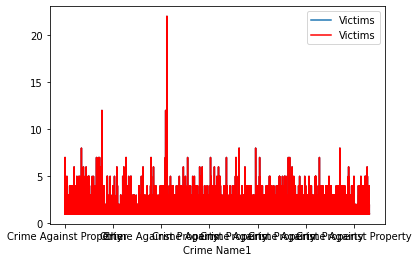

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='Crime Name1',y='Victims',ax=ax)
df.plot(kind='line',x='Crime Name1',y='Victims', color='red', ax=ax)

plt.show()

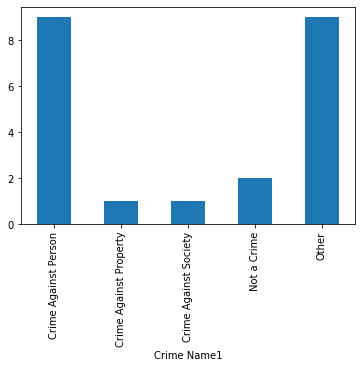

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('Crime Name1')['Victims'].nunique().plot(kind='bar')
plt.show()

In [ ]:
df['Crime Name3'].value_counts()

LARCENY - FROM AUTO                        27088
POLICE INFORMATION                         19172
ASSAULT - 2ND DEGREE                       18086
LARCENY - SHOPLIFTING                      16827
DRUGS - MARIJUANA - POSSESS                15753
                                           ...  
COMPOUNDING CRIME                              1
TRANSPORTING DANGEROUS MATERIALS               1
SEX ASSAULT - SODOMY-GIRL-GUN                  1
DAMAGE PROPERTY - PUBLIC-WITH EXPLOSIVE        1
BRIBERY (DESCRIBE OFFENSE)                     1
Name: Crime Name3, Length: 336, dtype: int64

In [ ]:
df.skew()

<ipython-input-256-9e0b1e29546f>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Incident ID        0.011536
CR Number         -1.925862
Victims           16.280781
Zip Code         -75.131610
Address Number    78.678102
Latitude          -5.792561
Longitude          5.796597
Years              0.104919
hours             -0.534015
dtype: float64

In [ ]:
df.kurt()

<ipython-input-257-8bd0d54cd88d>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Incident ID         -1.193457
CR Number            2.189731
Victims            695.626077
Zip Code          9995.735520
Address Number    8221.107148
Latitude            31.598781
Longitude           31.602965
Years               -1.125404
hours               -0.756906
dtype: float64

plot lat and lon 

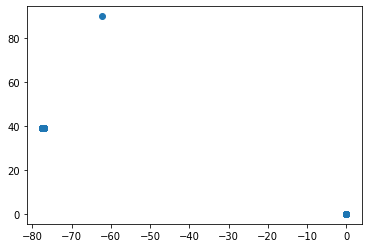

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.5 MB/s 
     |████████████████████████████████| 16.6 MB 52.0 MB/s 
     |████████████████████████████████| 7.8 MB 62.0 MB/s 


In [ ]:
df1.tail(1)

Longitude  Latitude  Crime Name1
47832 -62.372081      90.0            1

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


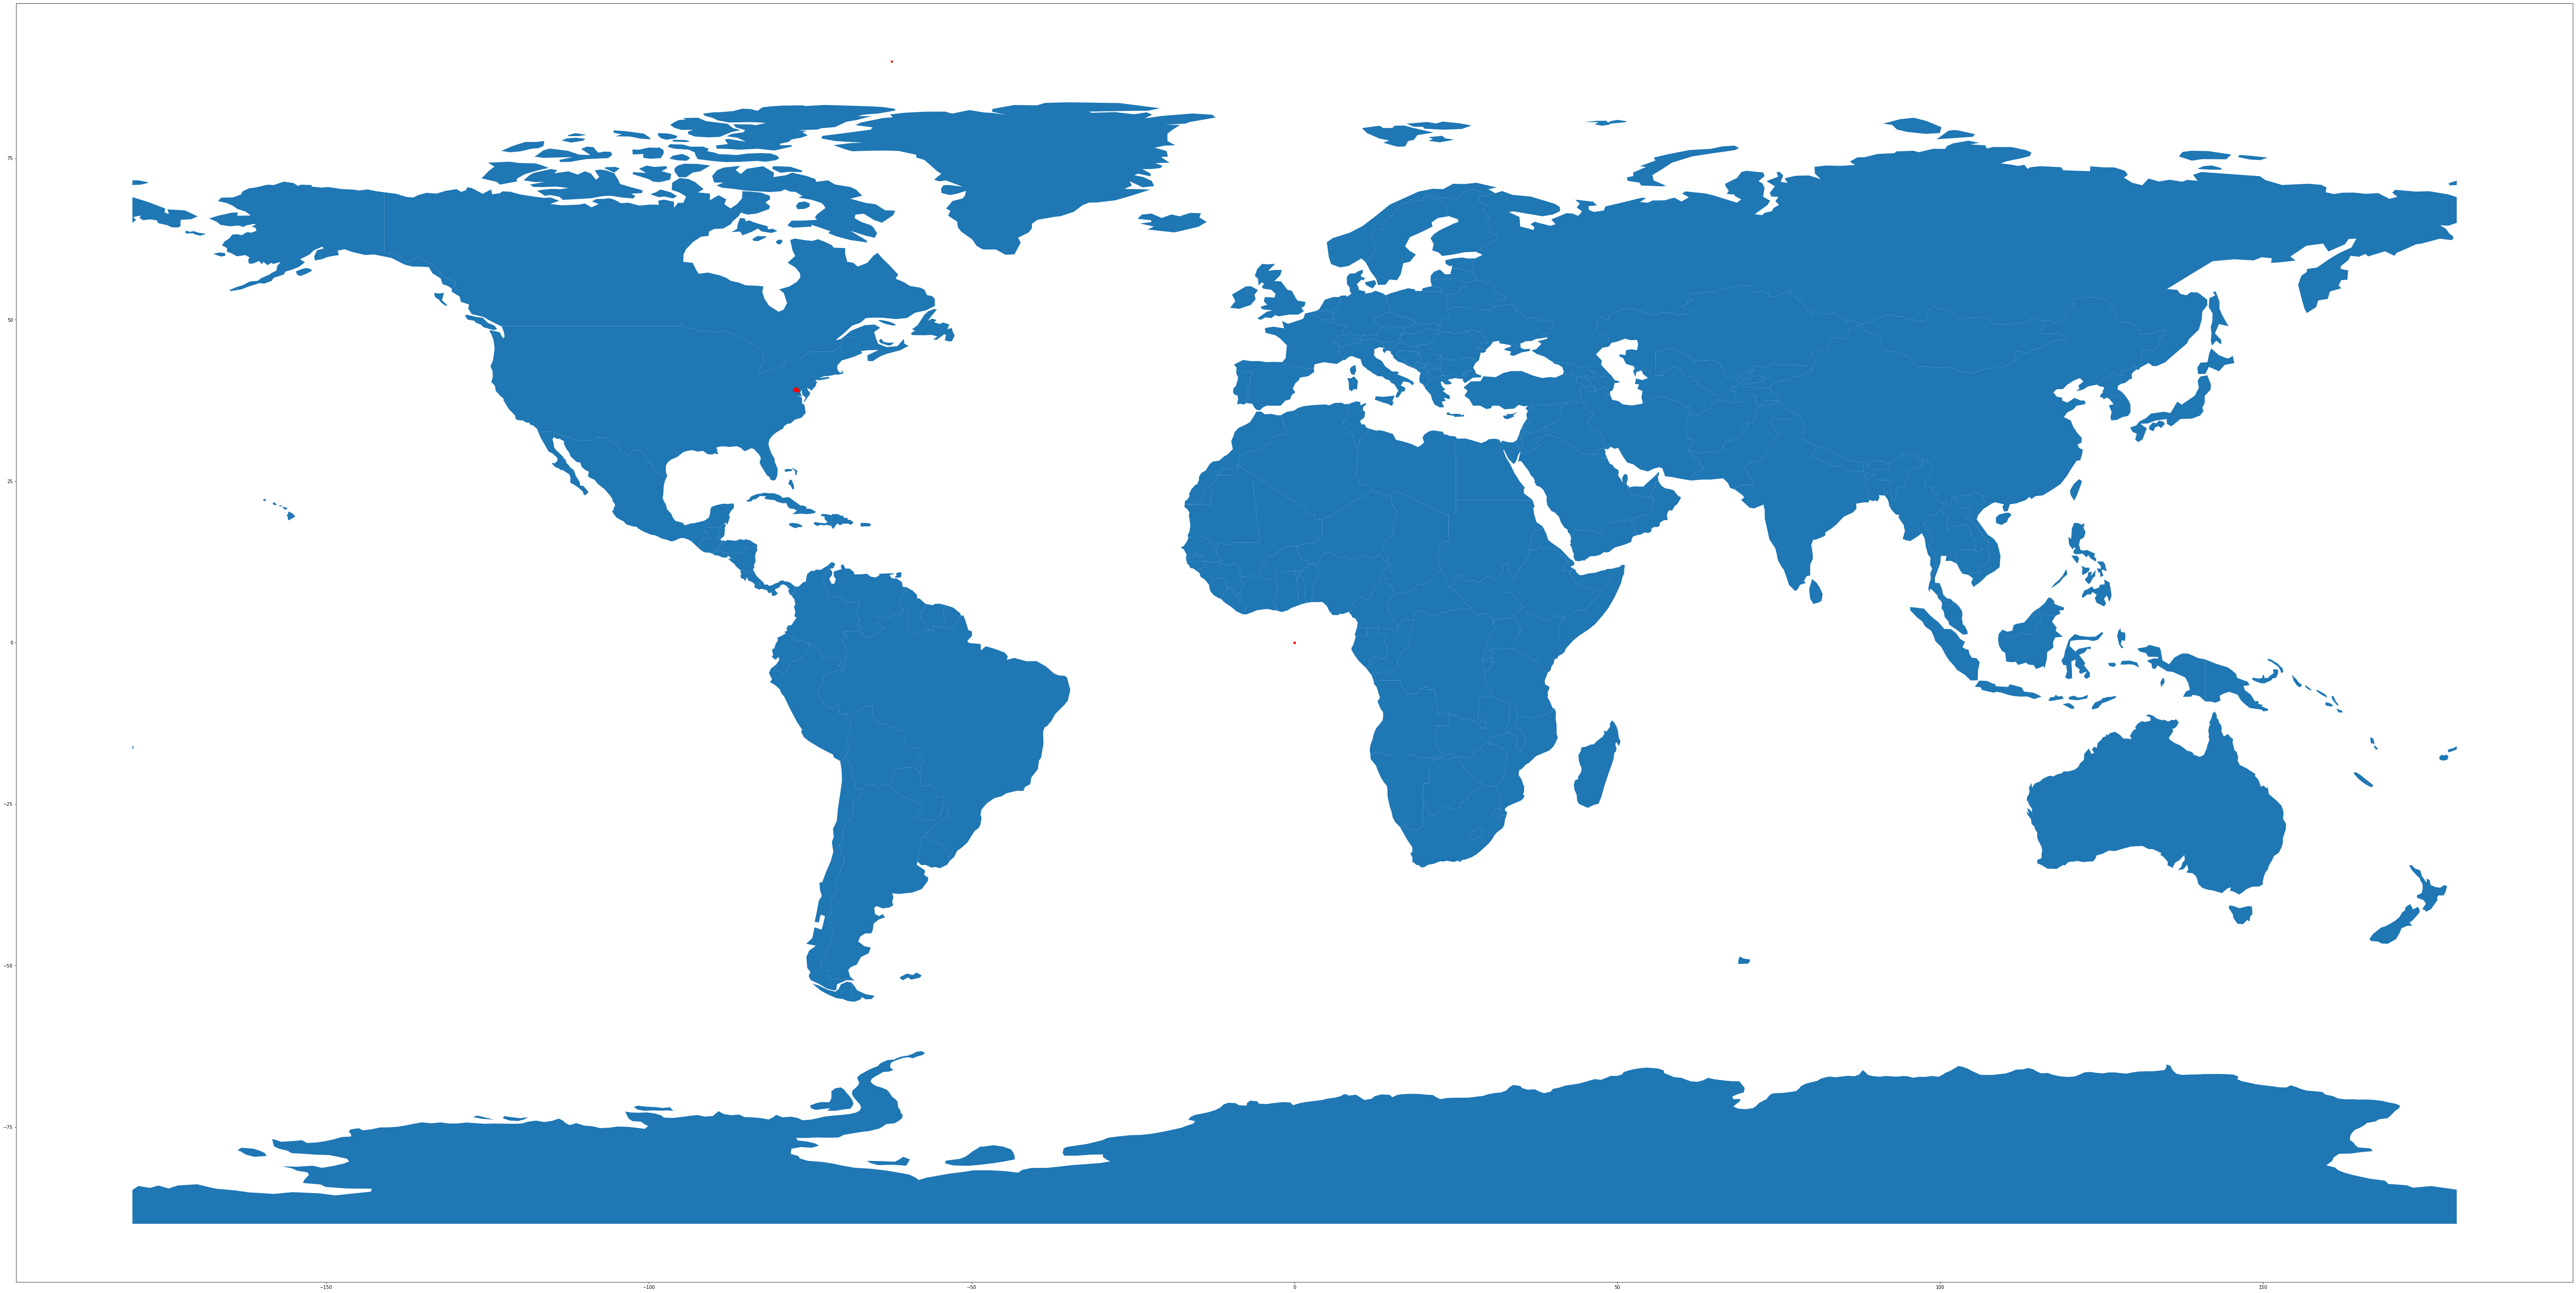

In [ ]:
gdf.plot(ax=world.plot(figsize=(100, 60)), marker='o', color='red', markersize=15);

In [ ]:
px.defaults.template = "seaborn"

In [ ]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
year_order = np.sort(df.Year.unique())
fig = px.histogram(
    df, x = "day_name", 
    category_orders = {"day_name": days_order, "Year": year_order},
    color = "Committed_At_Morning", barmode = "group",
)
fig.show()

AttributeError: ignored